<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/K_Means_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter("ignore")

### Loading Dataset

In [2]:
data = pd.read_csv('https://github.com/MpRonald/datasets/raw/main/Credit_Card_Dataset_for_Clustering.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Dataset Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.median(), inplace=True)
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [7]:
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
data.duplicated().sum()

0

In [9]:
data.drop('CUST_ID', axis=1, inplace=True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Visualization

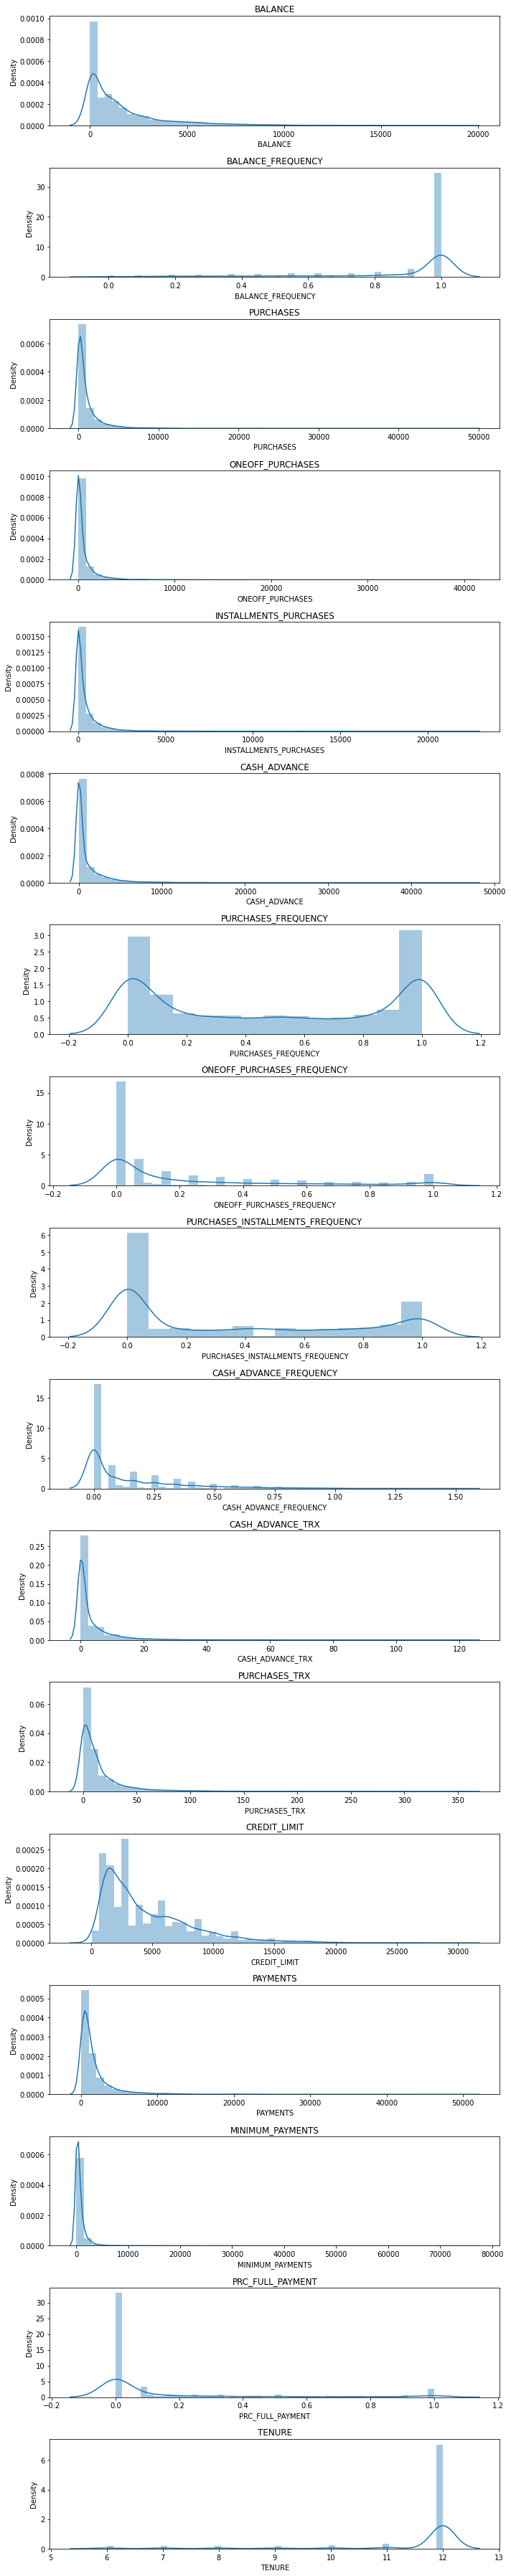

In [10]:
plt.figure(figsize=(10,50))
for i in range(len(data.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(data[data.columns[i]])
    plt.title(data.columns[i])
plt.tight_layout();

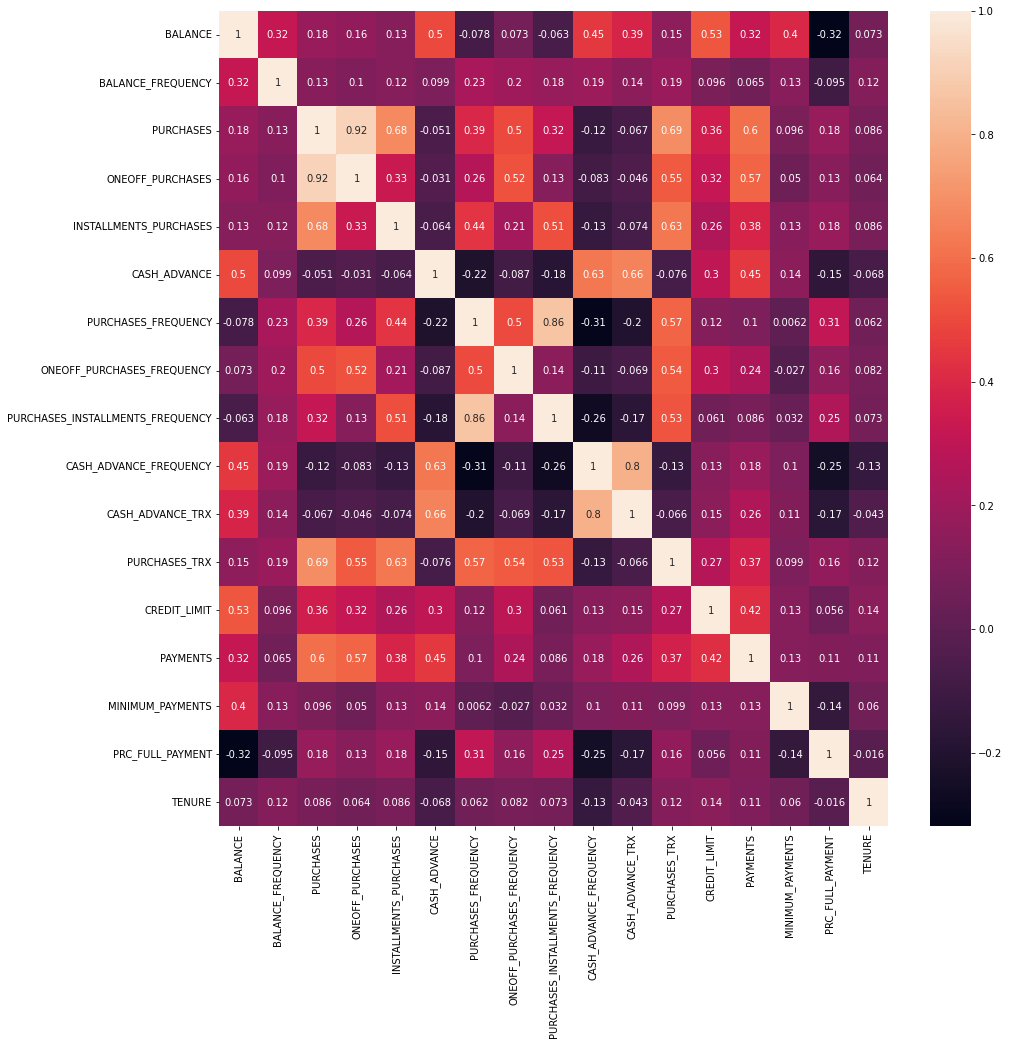

In [11]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True);

### Elbow Method

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [13]:
wcss_1 = []
range_val = range(1,20)
for i in range_val:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    wcss_1.append(kmeans.inertia_)

In [14]:
print(f"Cluster | Values | Dif %")
for j in range(len(wcss_1)):
    print(f"Clusters {j+1} | {round(wcss_1[j],2)} | {round(((wcss_1[j]/wcss_1[j-1])-1)*100,2)}%")

Cluster | Values | Dif %
Clusters 1 | 152150.0 | 199.22%
Clusters 2 | 127784.71 | -16.01%
Clusters 3 | 111973.99 | -12.37%
Clusters 4 | 99061.85 | -11.53%
Clusters 5 | 91491.11 | -7.64%
Clusters 6 | 84826.62 | -7.28%
Clusters 7 | 79731.65 | -6.01%
Clusters 8 | 74598.65 | -6.44%
Clusters 9 | 70894.36 | -4.97%
Clusters 10 | 66452.42 | -6.27%
Clusters 11 | 63614.95 | -4.27%
Clusters 12 | 61368.78 | -3.53%
Clusters 13 | 59147.42 | -3.62%
Clusters 14 | 57483.12 | -2.81%
Clusters 15 | 56157.07 | -2.31%
Clusters 16 | 54261.85 | -3.37%
Clusters 17 | 53420.23 | -1.55%
Clusters 18 | 51589.18 | -3.43%
Clusters 19 | 50848.45 | -1.44%


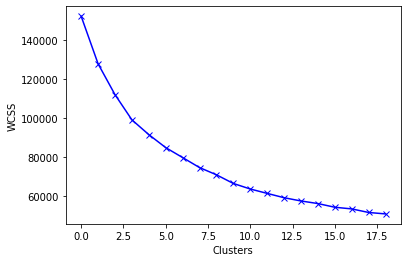

In [15]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

### K-Means

In [16]:
kmeans_7 = KMeans(n_clusters=7)
kmeans_8 = KMeans(n_clusters=8)
kmeans_9 = KMeans(n_clusters=9)

kmeans_7.fit(data_scaled)
kmeans_8.fit(data_scaled)
kmeans_9.fit(data_scaled)

labels_7 = kmeans_7.labels_
labels_8 = kmeans_8.labels_
labels_9 = kmeans_9.labels_

In [17]:
np.unique(labels_7, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([1270, 2040, 2843,   86,  893, 1187,  631]))

In [18]:
np.unique(labels_8, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1043,   82,  621, 1992, 1245, 2591, 1181,  195]))

In [19]:
np.unique(labels_9, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([ 351, 1033, 2505, 1963, 1173,  192, 1089,  620,   24]))

In [20]:
for i in range(7):
    print(f"Center {i+1} || Mean = {kmeans_7.cluster_centers_[i].mean()}")

Center 1 || Mean = 0.4954916301575247
Center 2 || Mean = 0.049277661309684605
Center 3 || Mean = -0.21930552597853237
Center 4 || Mean = 2.2156465839554276
Center 5 || Mean = 0.4748605132537355
Center 6 || Mean = -0.40476759377430943
Center 7 || Mean = -0.3831538994455346


In [21]:
for i in range(8):
    print(f"Center {i+1} || Mean = {kmeans_8.cluster_centers_[i].mean()}")

Center 1 || Mean = 0.24213580971598525
Center 2 || Mean = 2.238846006261779
Center 3 || Mean = -0.38661814272068684
Center 4 || Mean = 0.048523009287870664
Center 5 || Mean = 0.5074079682108481
Center 6 || Mean = -0.24675157758193336
Center 7 || Mean = -0.4057579953457056
Center 8 || Mean = 0.9907038246374199


In [22]:
for i in range(9):
    print(f"Center {i+1} || Mean = {kmeans_9.cluster_centers_[i].mean()}")

Center 1 || Mean = 1.105139903895931
Center 2 || Mean = 0.2414448394594314
Center 3 || Mean = -0.2550977509719416
Center 4 || Mean = 0.05594762270595792
Center 5 || Mean = -0.40837651300617334
Center 6 || Mean = 0.972047542058129
Center 7 || Mean = 0.31744864734521977
Center 8 || Mean = -0.3879740168402424
Center 9 || Mean = 3.29637052278924


In [23]:
cluster_centers_7 = pd.DataFrame(data=kmeans_7.cluster_centers_, columns=[data.columns])
cluster_centers_7

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.128727,0.429707,0.936945,0.893701,0.573500,-0.307679,1.092510,1.870200,0.536670,-0.406644,-0.317553,1.196726,0.699661,0.386263,-0.051236,0.454050,0.307809
1,-0.368430,0.330056,-0.039725,-0.235423,0.338408,-0.369282,0.981716,-0.360241,1.175610,-0.479296,-0.363344,0.173922,-0.279111,-0.222459,-0.008548,0.309936,0.253931
2,0.005970,0.402619,-0.343708,-0.225103,-0.399031,-0.105420,-0.808696,-0.335409,-0.751506,0.083233,-0.042493,-0.464140,-0.302581,-0.249089,-0.012413,-0.452795,0.272367
3,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198396,4.783704,1.088198,0.824001,0.334613
4,1.668800,0.396392,-0.206192,-0.150467,-0.211188,1.989904,-0.459018,-0.191707,-0.406858,1.909199,1.920628,-0.244655,1.007285,0.819113,0.558243,-0.394986,0.068135
5,-0.701828,-2.136168,-0.307232,-0.230688,-0.302515,-0.320818,-0.547978,-0.429080,-0.441452,-0.521898,-0.376692,-0.416805,-0.170885,-0.192057,-0.284884,0.297891,0.202040
6,-0.336070,-0.346074,-0.284289,-0.209289,-0.287337,0.066255,-0.195396,-0.273269,-0.227170,0.302768,-0.002789,-0.385220,-0.551372,-0.389433,-0.216520,0.011192,-3.189604


In [24]:
cluster_centers_8 = pd.DataFrame(data=kmeans_8.cluster_centers_, columns=[data.columns])
cluster_centers_8

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.412660,0.413021,-0.298352,-0.218726,-0.303660,1.132606,-0.617703,-0.321187,-0.533240,1.470257,1.141024,-0.360128,0.756007,0.209674,0.572725,-0.454328,0.115659
1,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171489,4.847281,1.112018,0.830765,0.333341
2,-0.346882,-0.349189,-0.285628,-0.211376,-0.286660,0.056409,-0.187573,-0.272094,-0.220384,0.286174,-0.011921,-0.384420,-0.559612,-0.390264,-0.218247,0.019835,-3.210676
3,-0.388606,0.330247,-0.036533,-0.232417,0.340444,-0.374958,0.998019,-0.355139,1.194251,-0.490707,-0.371328,0.178427,-0.284329,-0.227698,-0.038168,0.330205,0.253179
4,0.129948,0.430098,0.960153,0.909003,0.600255,-0.303526,1.104924,1.885707,0.554834,-0.400275,-0.311217,1.226866,0.705741,0.405319,-0.045782,0.467097,0.306792
5,-0.107640,0.395936,-0.335735,-0.217177,-0.394724,-0.191285,-0.775745,-0.310771,-0.737887,-0.036767,-0.128365,-0.454410,-0.380205,-0.275858,-0.074820,-0.446943,0.277621
6,-0.701651,-2.142956,-0.306819,-0.230396,-0.302076,-0.322131,-0.547833,-0.429443,-0.440363,-0.520369,-0.376892,-0.416439,-0.169231,-0.201821,-0.284885,0.295314,0.200105
7,1.755047,0.337815,0.070890,0.051425,0.072767,4.020035,-0.171725,0.083431,-0.133867,2.557841,3.751679,0.065522,1.284946,2.699045,0.567191,-0.189707,0.019631


In [25]:
cluster_centers_9 = pd.DataFrame(data=kmeans_9.cluster_centers_, columns=[data.columns])
cluster_centers_9

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.035248,0.464401,2.514396,1.822499,2.597048,-0.168999,1.164193,1.564632,1.268366,-0.289888,-0.175483,3.149143,1.295995,1.394771,0.555457,0.258339,0.337262
1,1.420431,0.412747,-0.298836,-0.218646,-0.304949,1.129836,-0.622307,-0.325028,-0.530500,1.474309,1.148734,-0.368479,0.759559,0.208366,0.558444,-0.454577,0.115457
2,-0.106481,0.396399,-0.349951,-0.235100,-0.395406,-0.186396,-0.819502,-0.371154,-0.739262,-0.025429,-0.121634,-0.471793,-0.384436,-0.281109,-0.072942,-0.451116,0.278647
3,-0.376468,0.331457,-0.030502,-0.241643,0.371635,-0.367948,1.009812,-0.383600,1.225519,-0.484614,-0.367680,0.196660,-0.268459,-0.217805,-0.039086,0.334410,0.259423
4,-0.701763,-2.152838,-0.309525,-0.234049,-0.301761,-0.321429,-0.553849,-0.442105,-0.437957,-0.519922,-0.376880,-0.418455,-0.172978,-0.202188,-0.284701,0.286581,0.201421
5,1.751866,0.334998,0.013554,0.020478,-0.005895,4.080193,-0.219122,0.044417,-0.183880,2.549798,3.732259,-0.007813,1.298557,2.709796,0.553893,-0.185943,0.037653
6,-0.153290,0.401626,0.557615,0.685640,0.058645,-0.336222,1.000279,1.932595,0.191179,-0.419178,-0.334378,0.636090,0.440267,0.156240,-0.160291,0.470391,0.269419
7,-0.347549,-0.350947,-0.289126,-0.216754,-0.285054,0.055881,-0.190002,-0.285000,-0.212451,0.289851,-0.010227,-0.384864,-0.567477,-0.392716,-0.217979,0.016855,-3.208000
8,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185167,9.047799,1.038198,1.222264,0.298409


In [26]:
cluster_centers_7_inv = scaler.inverse_transform(cluster_centers_7)
cluster_centers_7_inv = pd.DataFrame(data=cluster_centers_7_inv, columns=[data.columns])
cluster_centers_7_inv

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1832.409401,0.979064,3005.002862,2075.798208,929.676352,333.654001,0.928828,0.760375,0.577724,0.053771,1.081761,44.455975,7039.958548,2851.337449,725.391429,0.286516,11.929245
1,797.619923,0.955458,918.330731,201.683338,717.085920,204.469086,0.884361,0.094991,0.831655,0.039232,0.769269,19.032892,3478.753167,1089.147751,824.967654,0.244366,11.857143
2,1576.900592,0.972647,268.867401,218.813018,50.228452,757.800287,0.165782,0.102399,0.065770,0.151800,2.958846,3.173057,3393.357955,1012.055497,815.951619,0.021280,11.881815
3,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
4,5037.940211,0.971172,562.671846,342.692852,220.092718,5151.791783,0.306124,0.145268,0.202741,0.517194,16.355705,8.628635,8159.233272,4104.395880,2147.099615,0.038188,11.608501
5,103.679857,0.371232,346.799789,209.543058,137.506773,306.100627,0.270420,0.074455,0.188993,0.030707,0.678180,4.349621,3872.526912,1177.158289,180.369278,0.240843,11.787700
6,864.973648,0.795289,395.817971,245.060808,151.232599,1117.811606,0.411929,0.120936,0.274154,0.195731,3.229794,5.134707,2488.145800,605.773318,339.839242,0.156988,7.248811


In [27]:
cluster_centers_8_inv = scaler.inverse_transform(cluster_centers_8)
cluster_centers_8_inv = pd.DataFrame(data=cluster_centers_8_inv, columns=[data.columns])
cluster_centers_8_inv

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4504.807125,0.975112,365.770844,229.397037,136.471285,3353.998870,0.242437,0.106641,0.152514,0.429358,11.035475,5.758389,7244.970801,2340.130910,2180.881074,0.020831,11.672100
1,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
2,842.469157,0.794551,392.957230,241.596087,151.844235,1097.163959,0.415069,0.121287,0.276851,0.192410,3.167472,5.154589,2458.164251,603.367356,335.810481,0.159516,7.220612
3,755.624496,0.955503,925.150719,206.672762,718.927294,192.567559,0.890904,0.096513,0.839063,0.036949,0.714789,19.144869,3459.768713,1073.980350,755.872801,0.250294,11.856137
4,1834.950518,0.979157,3054.586178,2101.195785,953.871162,342.362113,0.933810,0.765001,0.584943,0.055045,1.125000,45.205128,7062.081148,2906.501362,738.111921,0.290333,11.927885
5,1340.431333,0.971064,285.900818,231.968425,54.123393,577.737105,0.179007,0.109749,0.071182,0.127787,2.372829,3.414898,3110.928856,934.561309,670.376554,0.022991,11.888846
6,104.047384,0.369624,347.680254,210.027242,137.904112,303.347066,0.270479,0.074347,0.189426,0.031013,0.676819,4.358714,3878.544369,1148.891563,180.365680,0.240089,11.785110
7,5217.456830,0.957296,1154.662256,677.792718,476.869538,9409.072590,0.421429,0.227347,0.311235,0.646994,28.851282,16.338462,9169.487179,9546.615461,2167.970804,0.098229,11.543590


In [28]:
cluster_centers_9_inv = scaler.inverse_transform(cluster_centers_9)
cluster_centers_9_inv = pd.DataFrame(data=cluster_centers_9_inv, columns=[data.columns])
cluster_centers_9_inv

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3719.255140,0.987283,6375.249687,3617.413077,2759.546011,624.471382,0.957597,0.669218,0.868519,0.077135,2.051282,92.985755,9209.686610,5770.869797,2140.599705,0.229274,11.968661
1,4520.982595,0.975047,364.737425,229.530029,135.305818,3348.188953,0.240589,0.105496,0.153603,0.430168,11.088093,5.550823,7257.894042,2336.344030,2147.567554,0.020759,11.671830
2,1342.844045,0.971174,255.529433,202.219852,53.507138,587.990720,0.161445,0.091735,0.070636,0.130056,2.418762,2.982834,3095.535595,919.360330,674.758565,0.021771,11.890220
3,780.887989,0.955790,938.036322,191.359078,747.132303,207.267281,0.895637,0.088022,0.851490,0.038168,0.739684,19.598064,3517.509018,1102.618375,753.732476,0.251524,11.864493
4,103.813574,0.367283,341.899821,203.964280,138.188568,304.818761,0.268064,0.070569,0.190382,0.031103,0.676897,4.308610,3864.910012,1147.829525,180.795253,0.237535,11.786871
5,5210.836603,0.956629,1032.163802,626.426927,405.736875,9535.226512,0.402406,0.215708,0.291359,0.645385,28.718750,14.515625,9219.010417,9577.738413,2136.951420,0.099329,11.567708
6,1245.414695,0.972412,2194.558705,1730.458687,464.100018,273.797208,0.891811,0.778988,0.440417,0.051262,0.966942,30.520661,6096.168295,2185.443921,471.003175,0.291296,11.877870
7,841.080941,0.794135,385.482629,232.669855,153.296645,1096.056851,0.414094,0.117437,0.280004,0.193146,3.179032,5.143548,2429.548387,596.270696,336.436547,0.158644,7.224194
8,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


In [29]:
data_cluster_7 = pd.concat([data, pd.DataFrame({'cluster':labels_7})], axis=1)
data_cluster_8 = pd.concat([data, pd.DataFrame({'cluster':labels_8})], axis=1)
data_cluster_9 = pd.concat([data, pd.DataFrame({'cluster':labels_9})], axis=1)

In [30]:
data_cluster_7

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


In [31]:
data_cluster_8

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


In [32]:
data_cluster_9

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,7
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,7
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,7
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,7


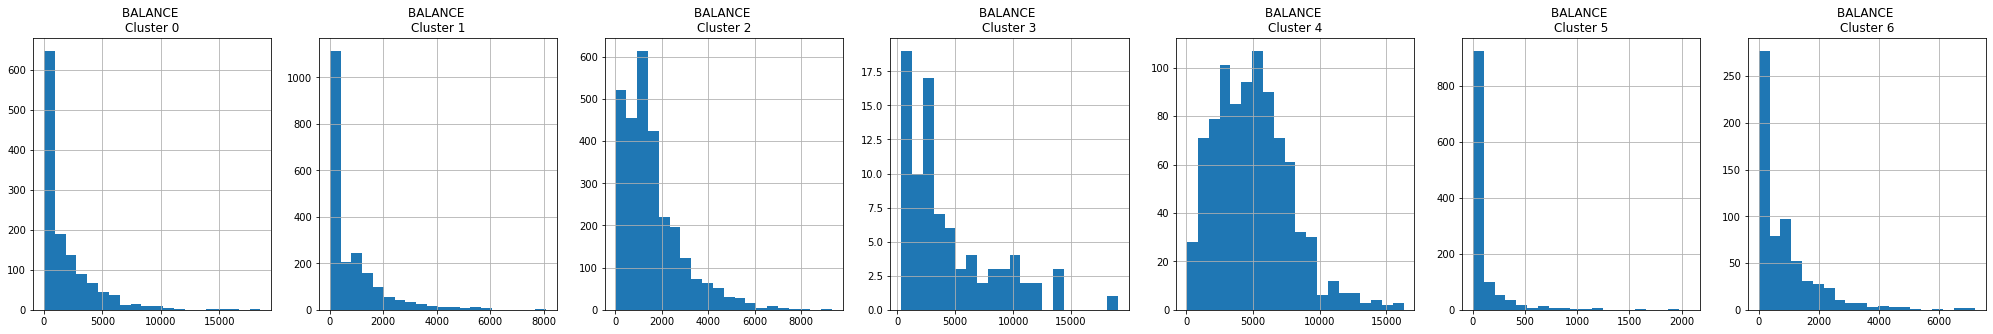

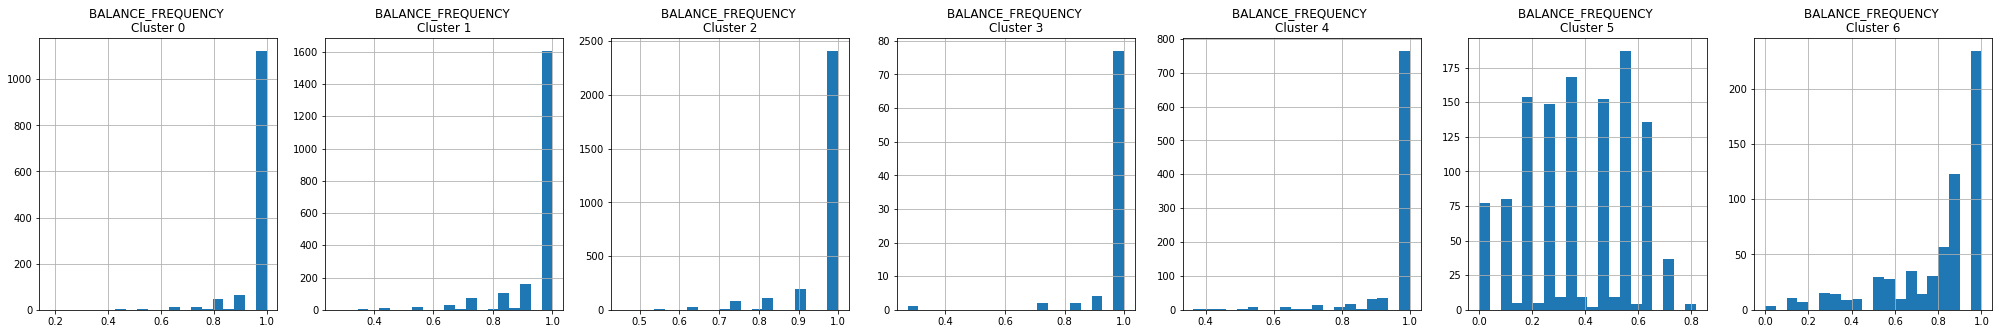

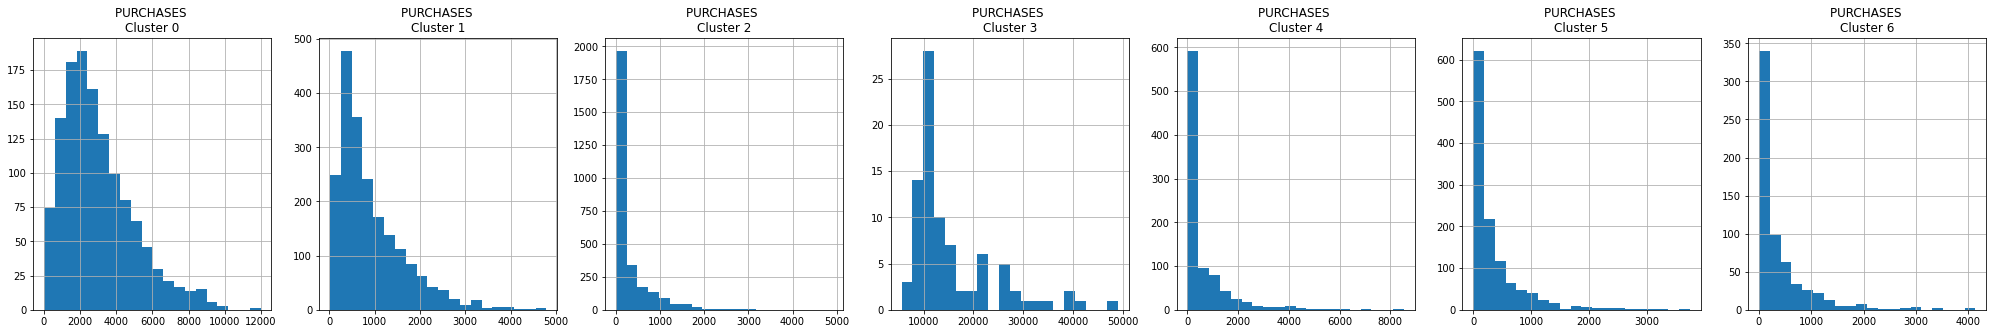

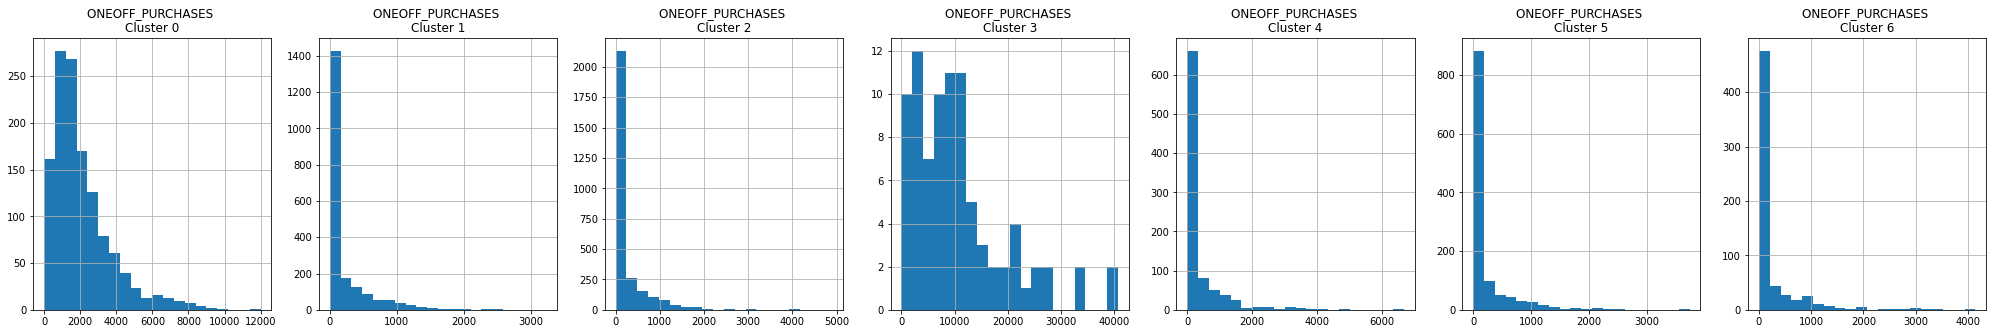

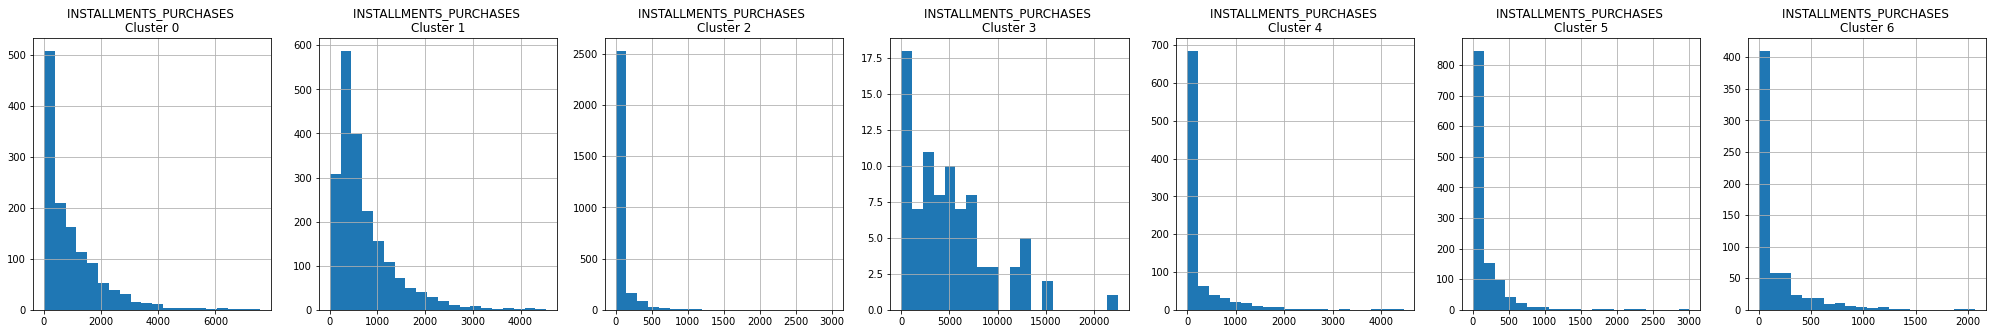

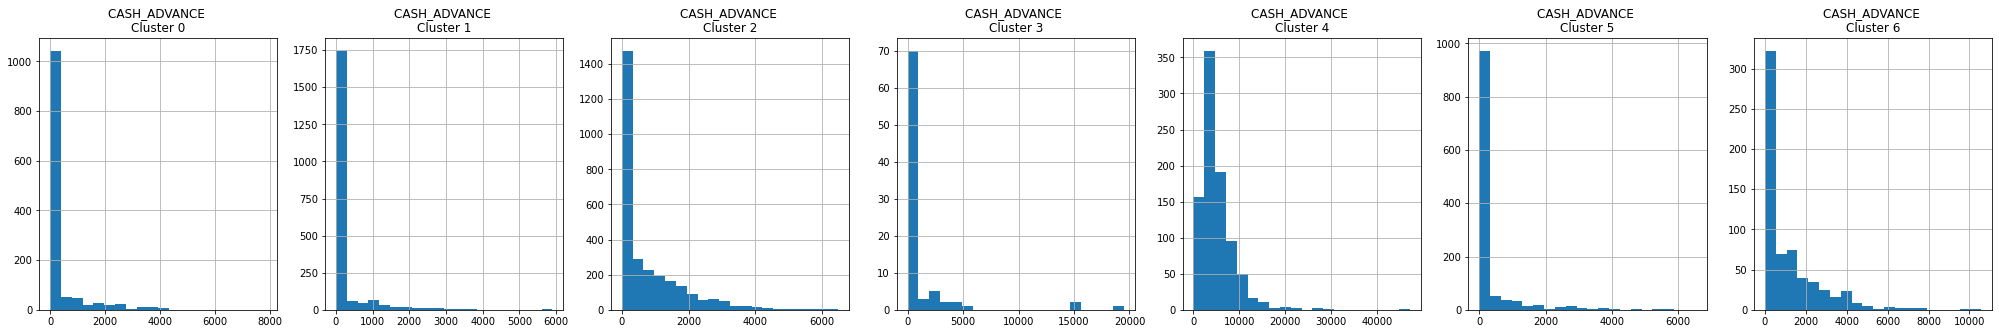

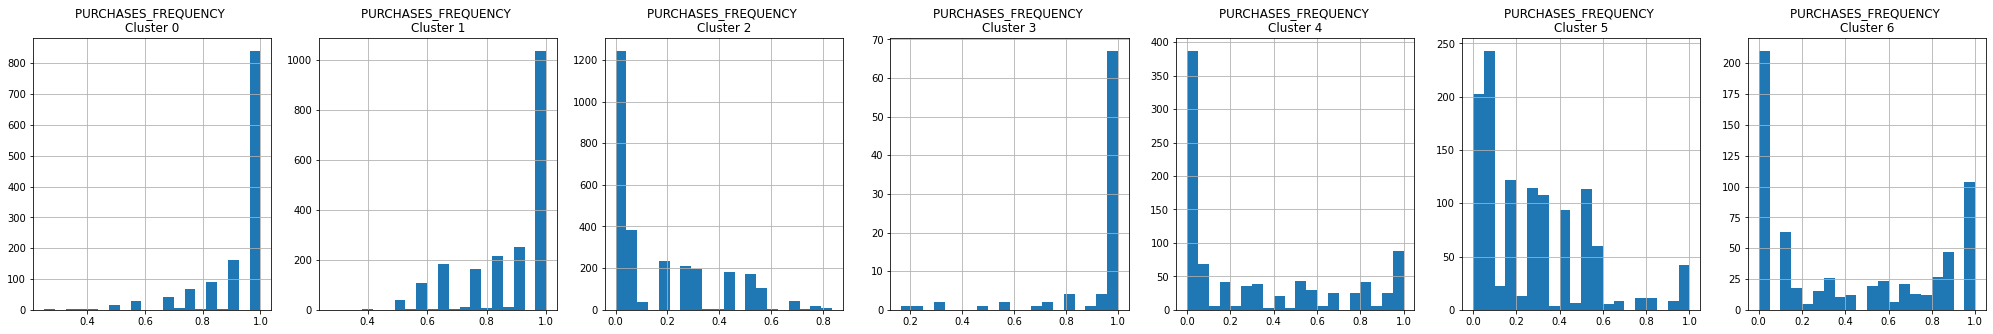

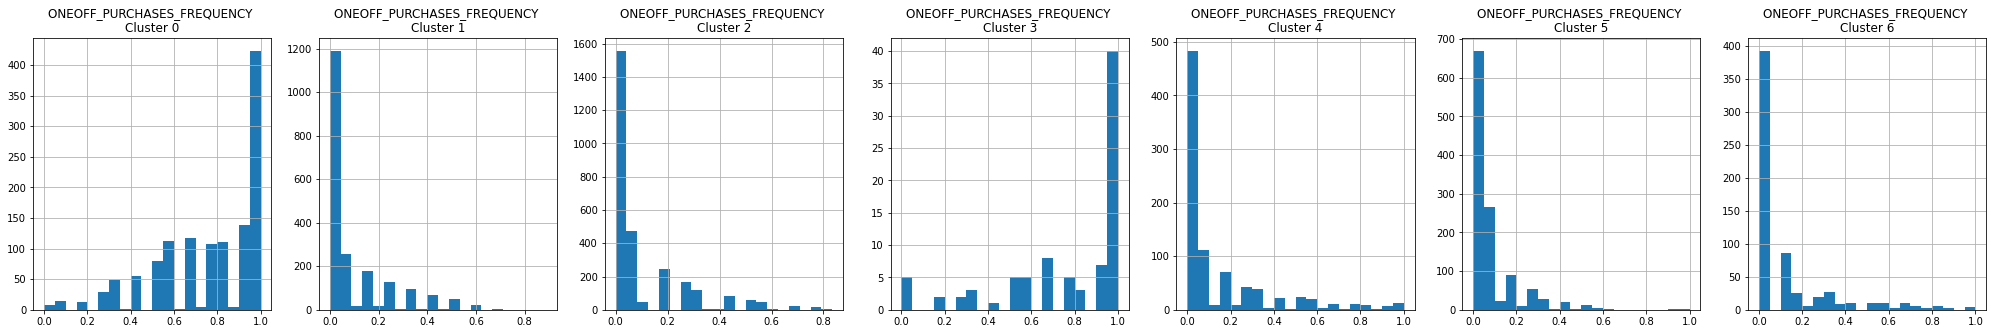

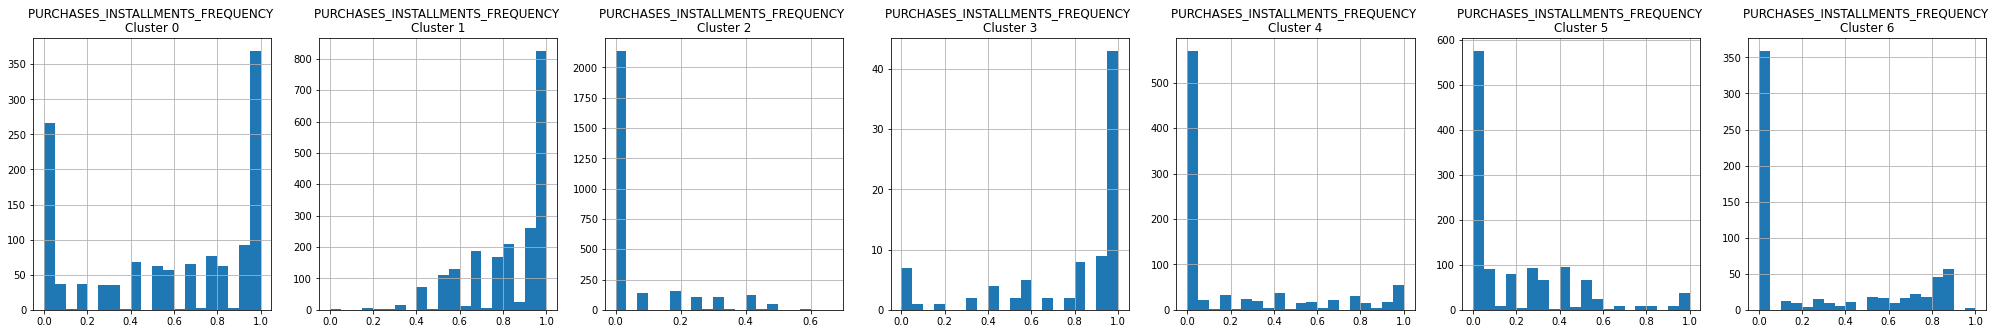

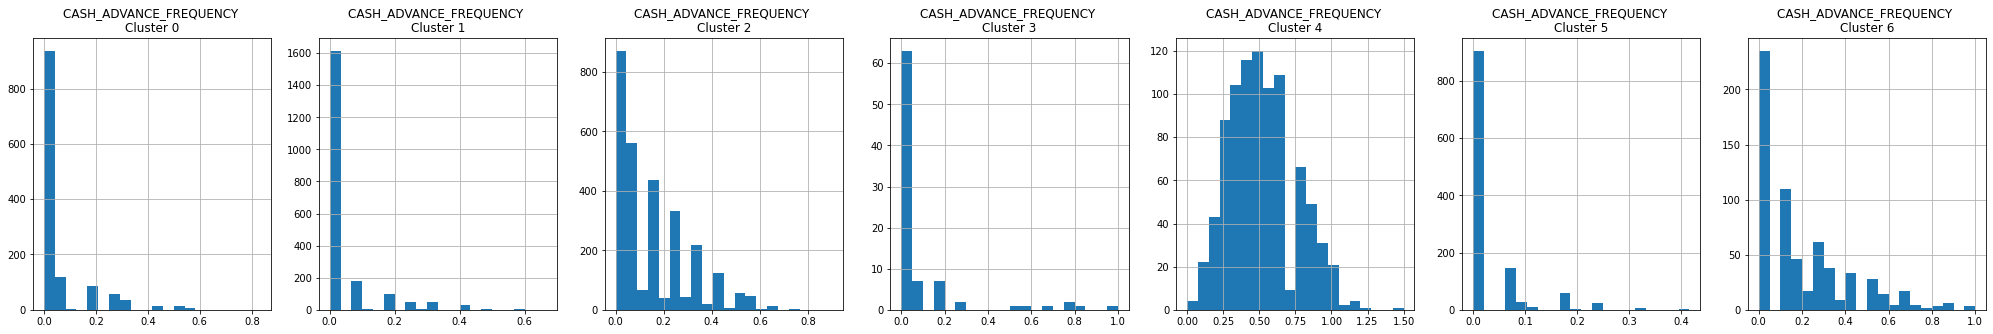

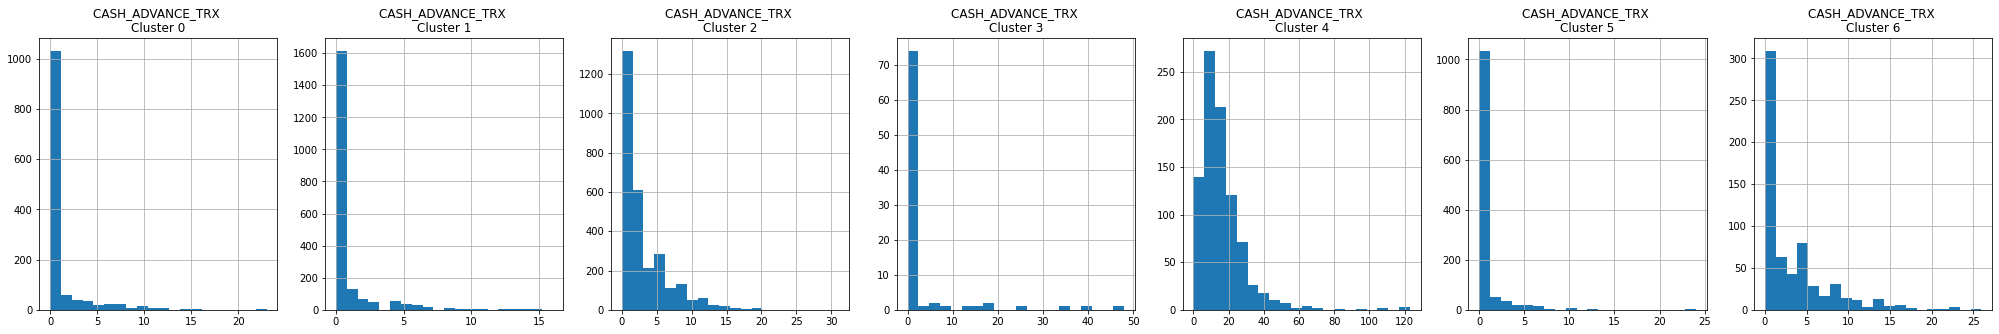

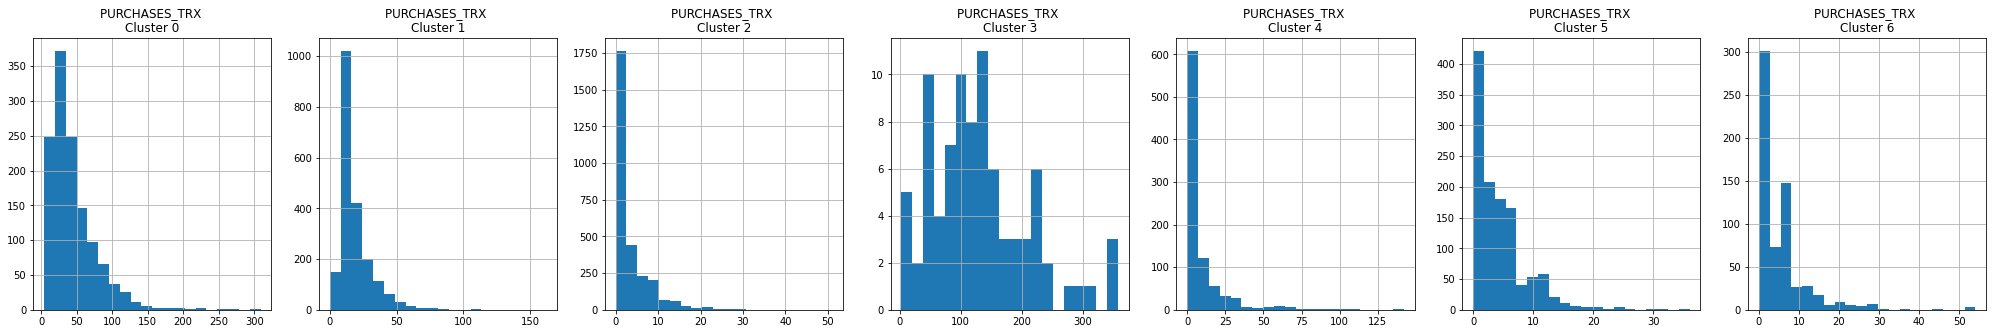

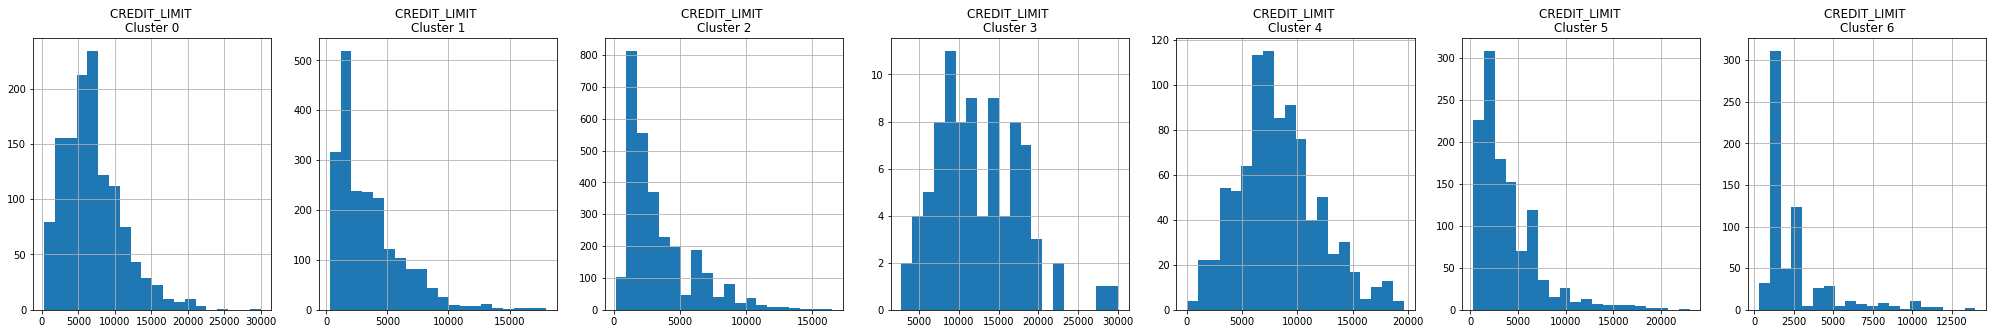

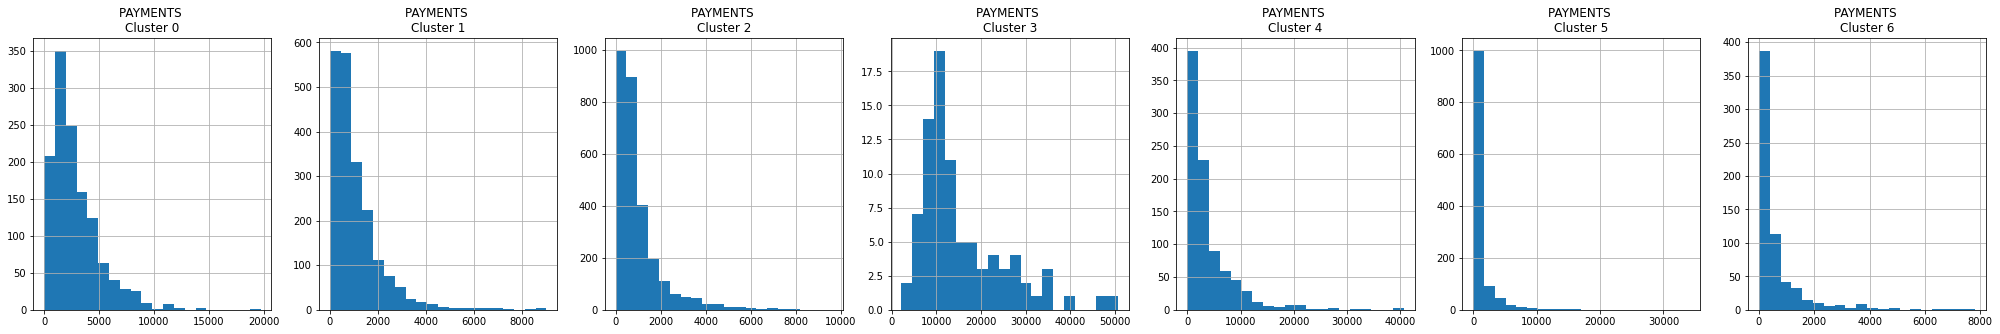

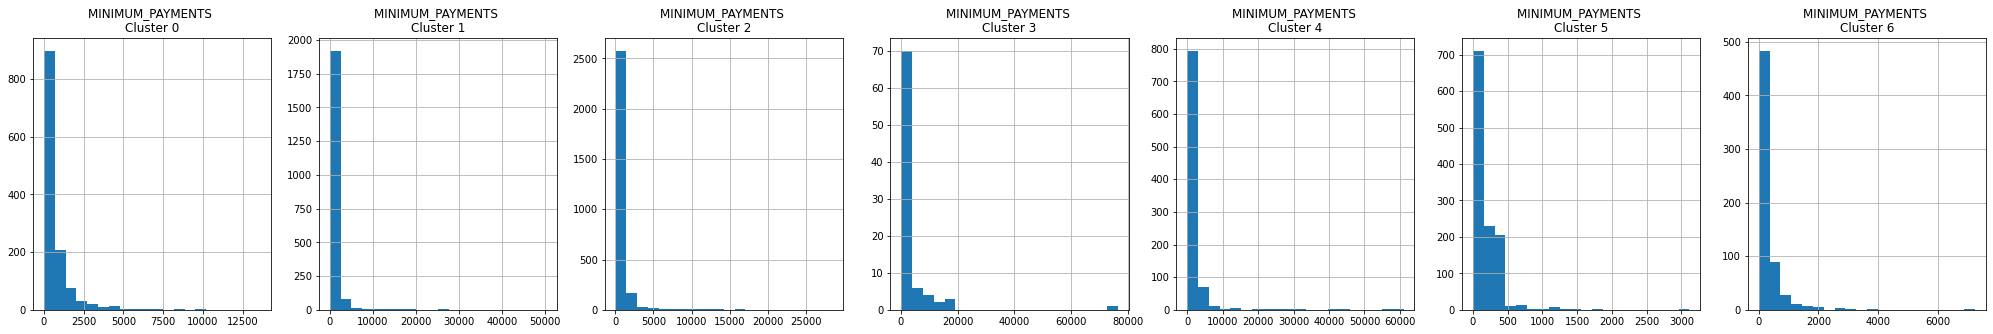

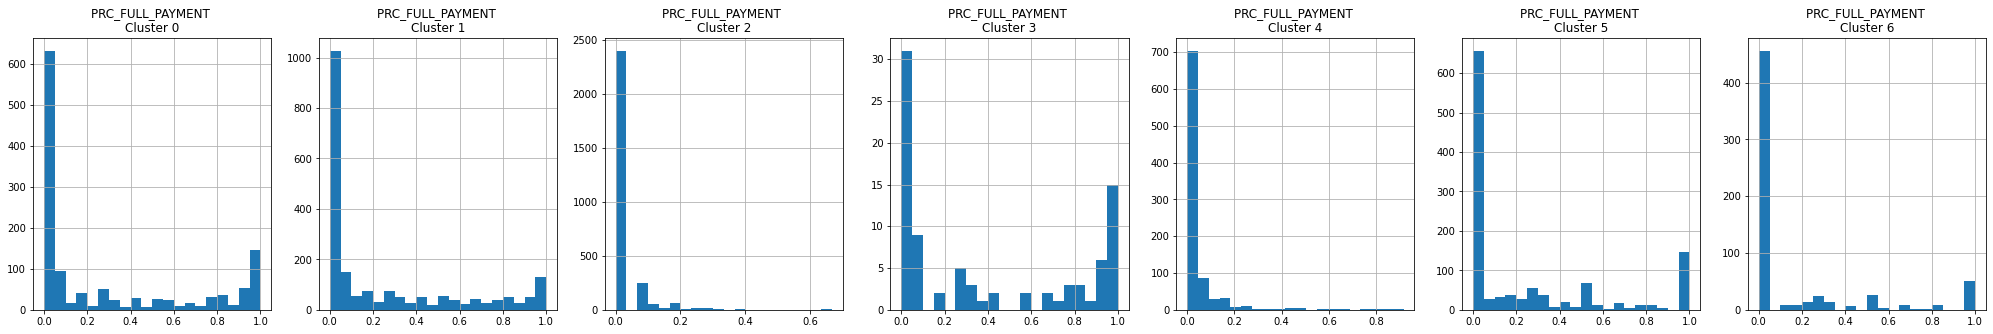

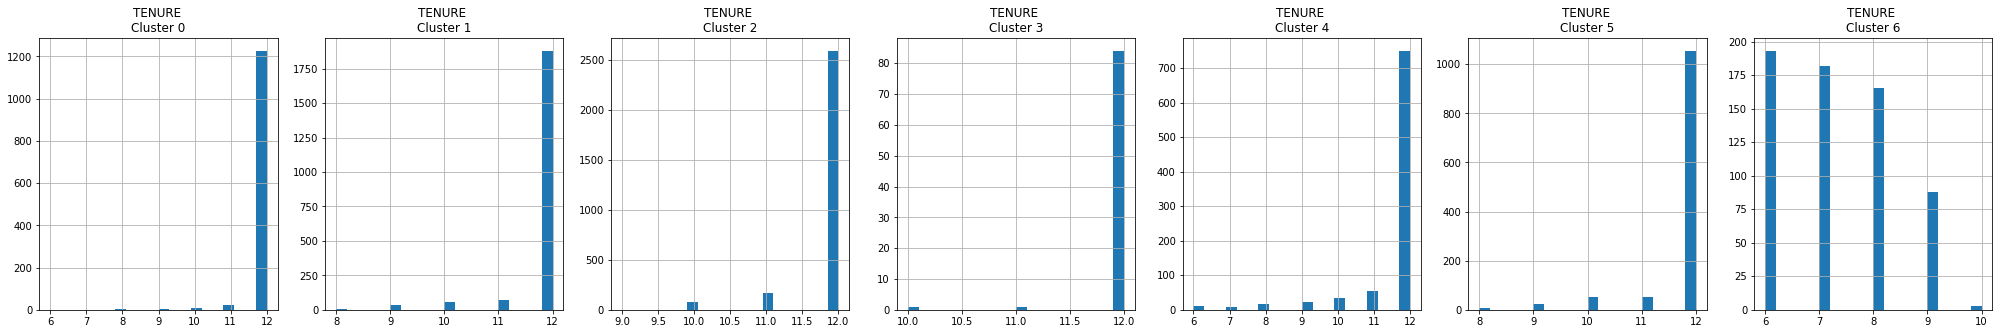

In [33]:
for i in data.columns:
  plt.figure(figsize=(35,5))
  for j in range(7):
    plt.subplot(1, 7, j + 1)
    cluster = data_cluster_7[data_cluster_7['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(f'{i} \nCluster {j}')
  plt.show()

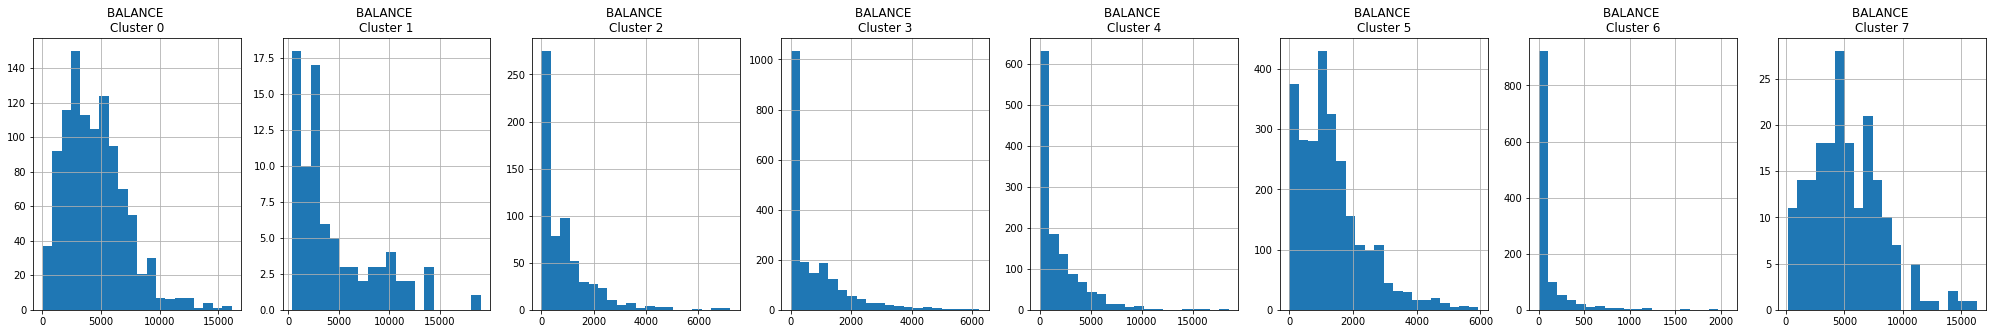

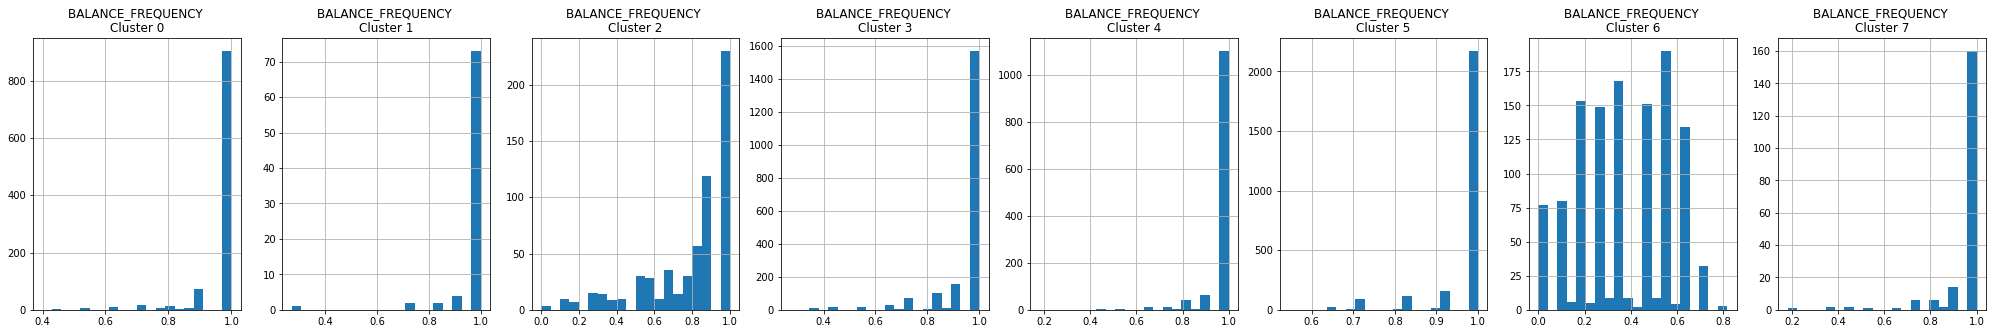

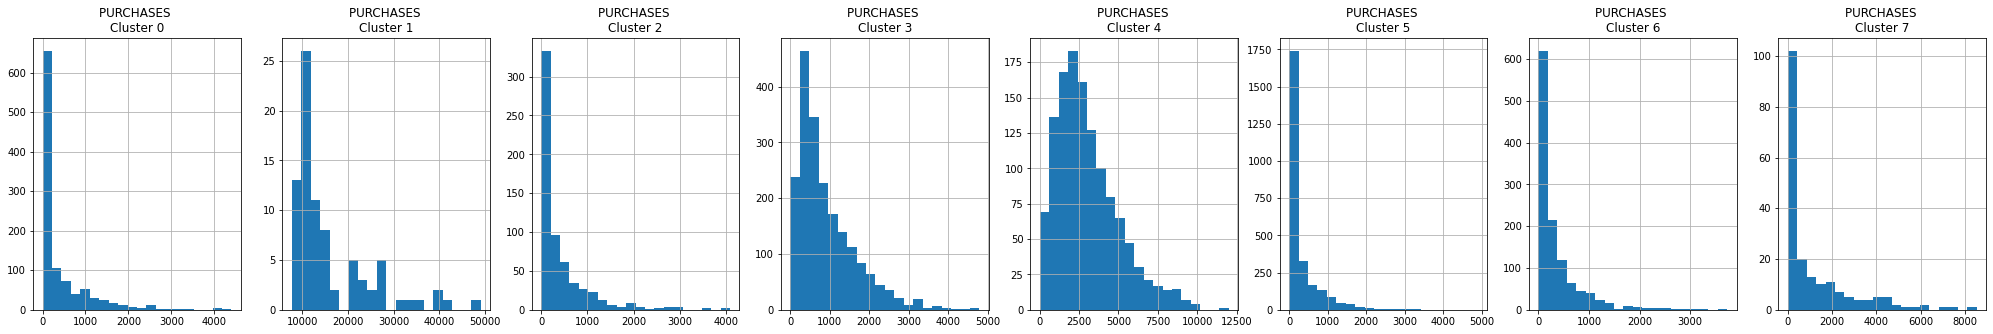

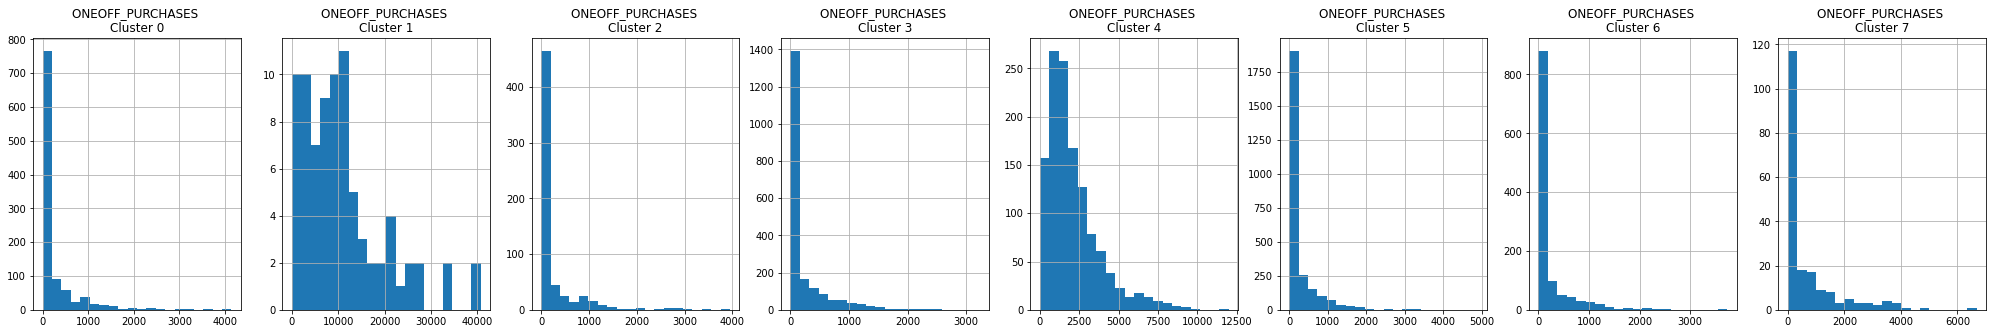

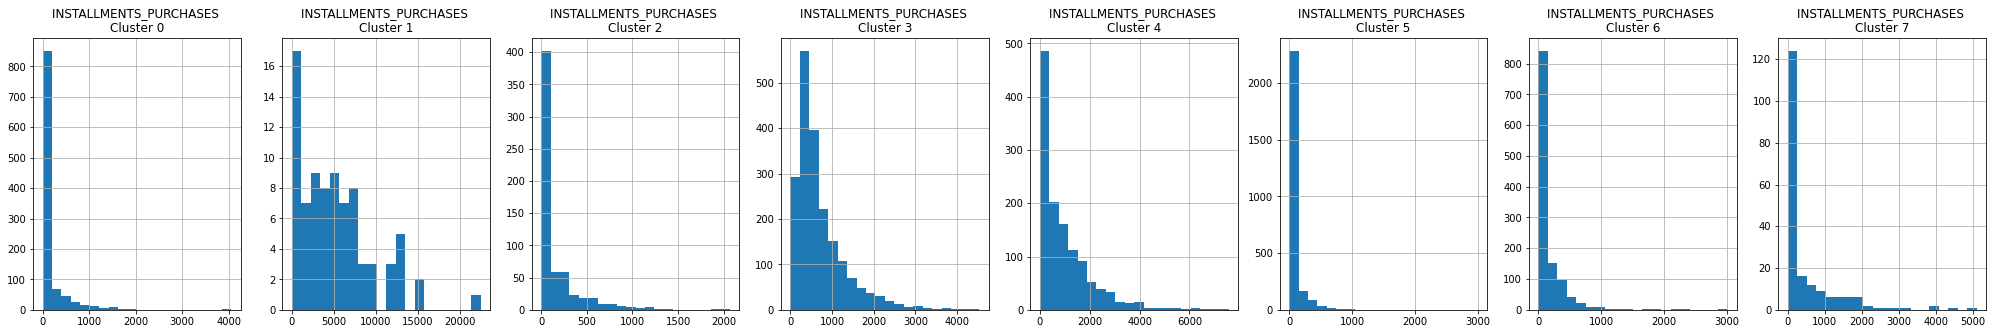

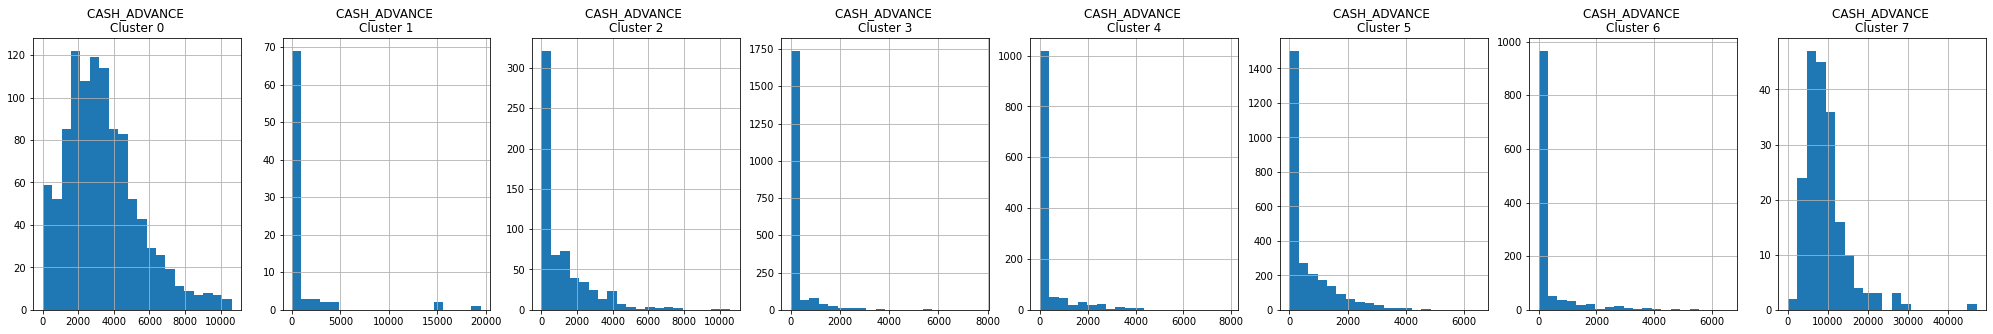

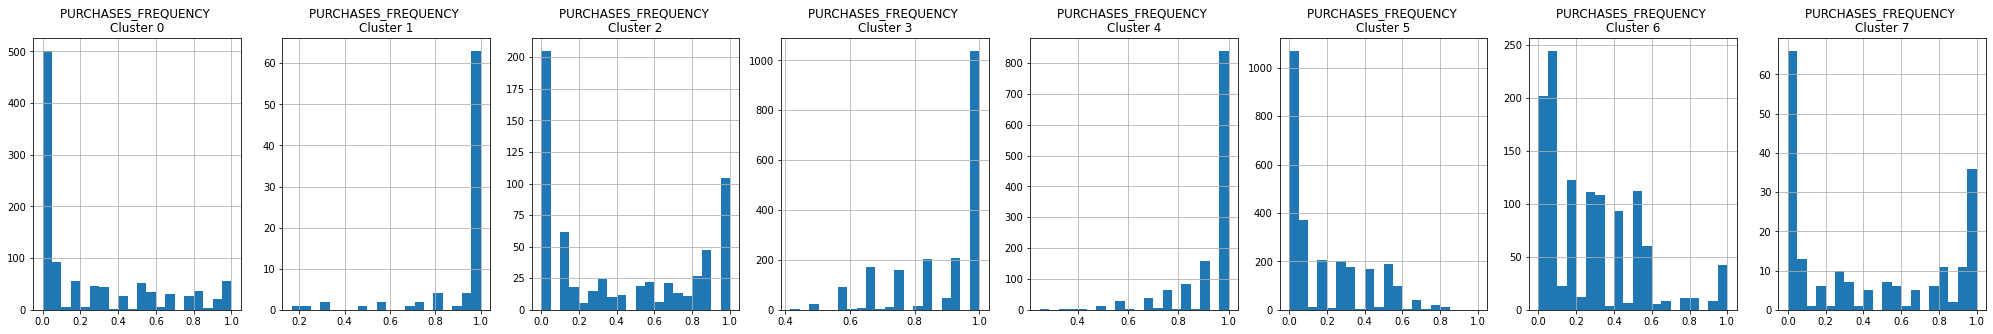

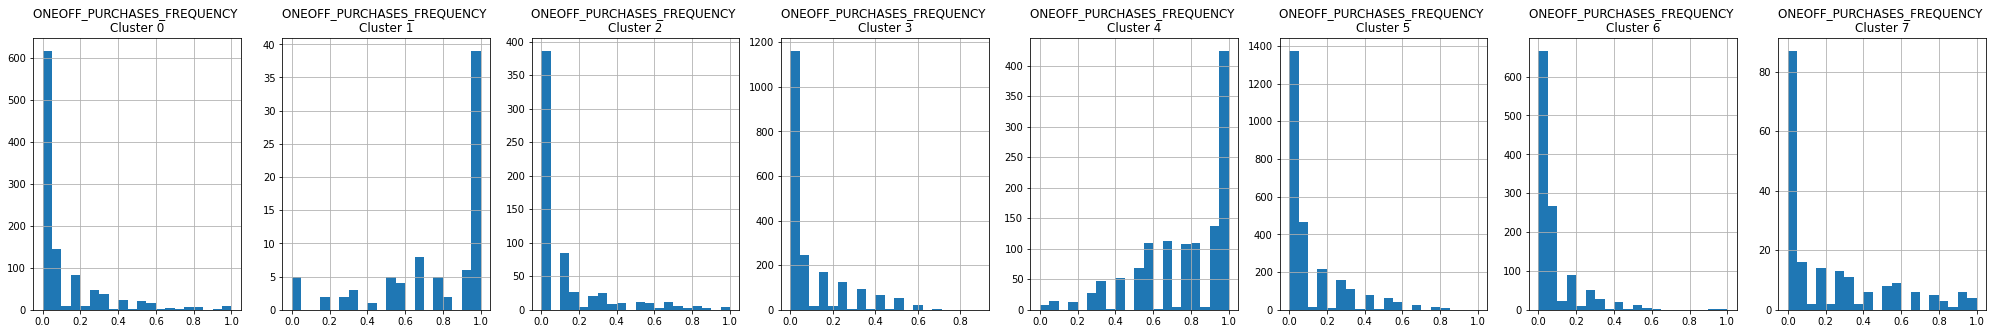

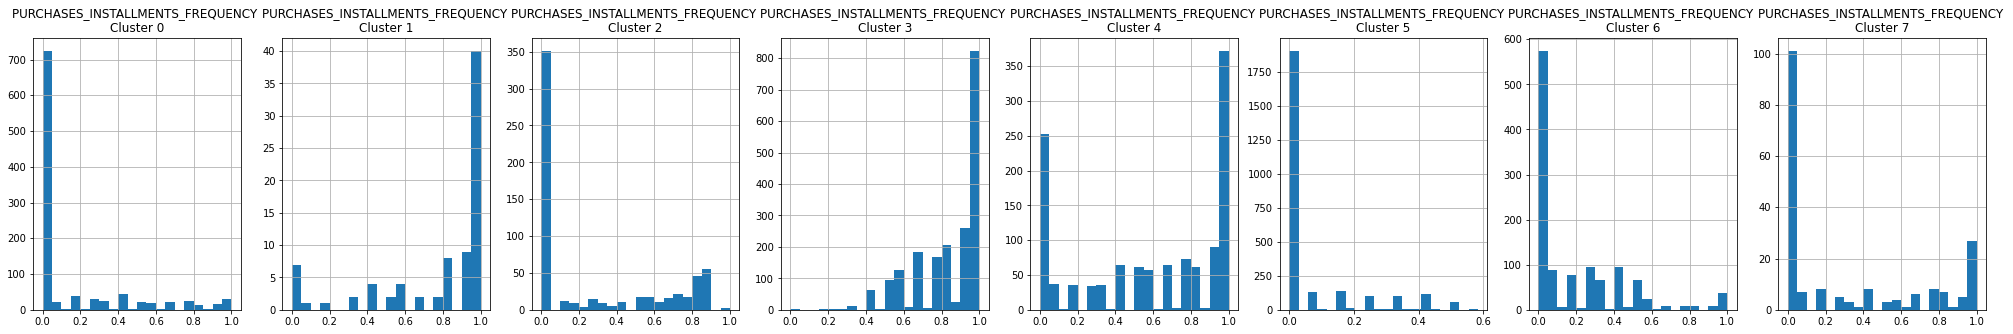

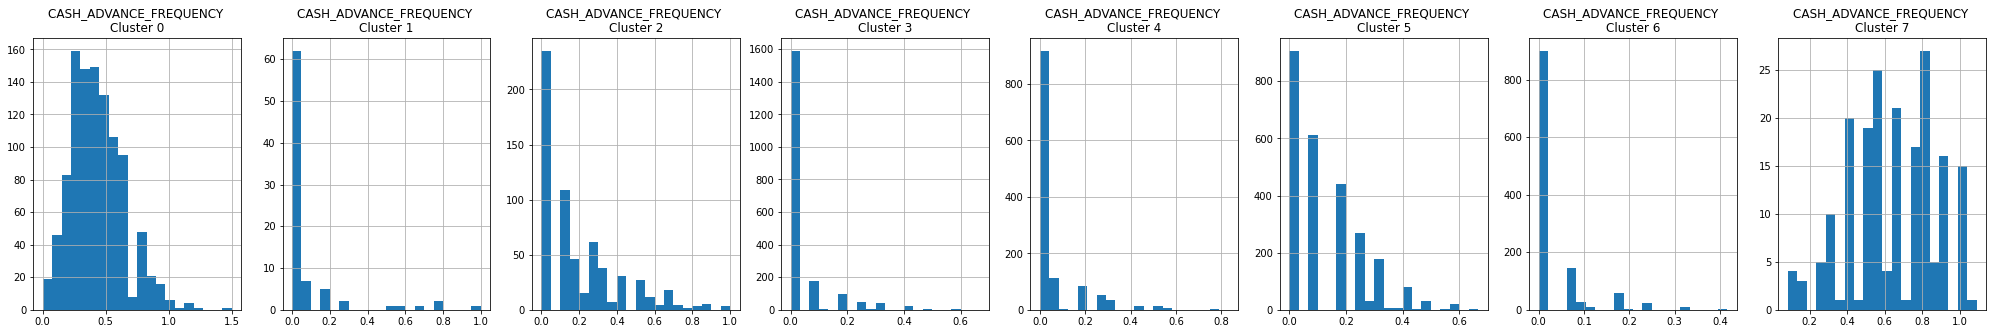

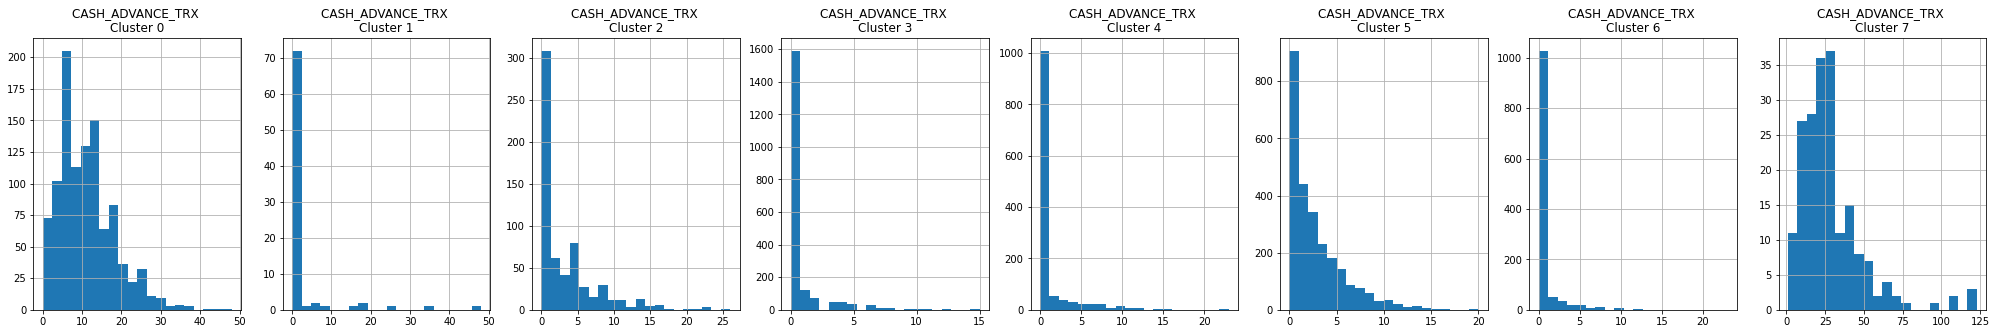

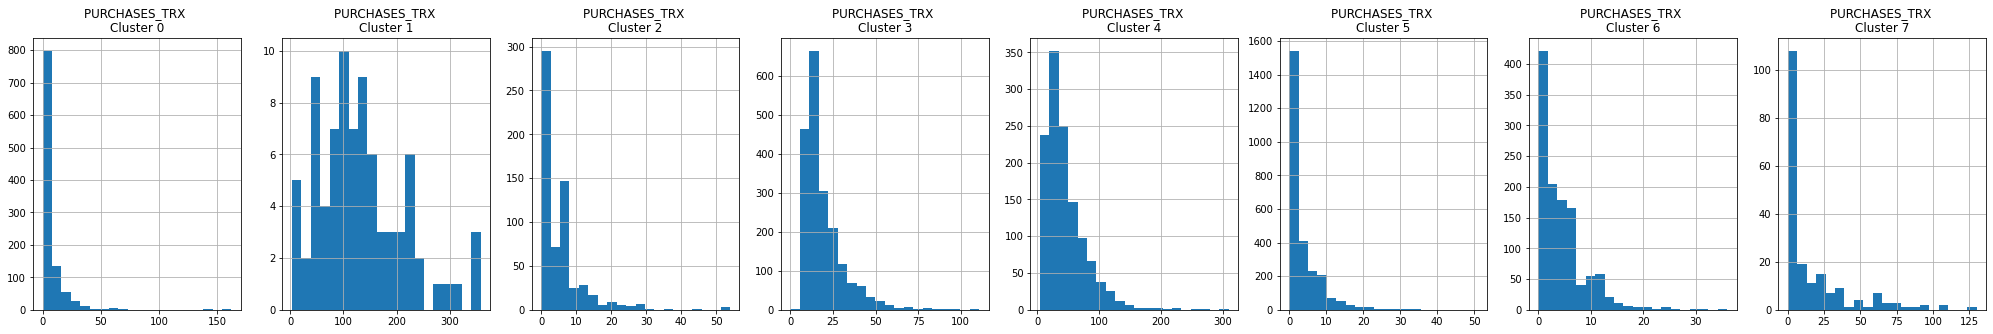

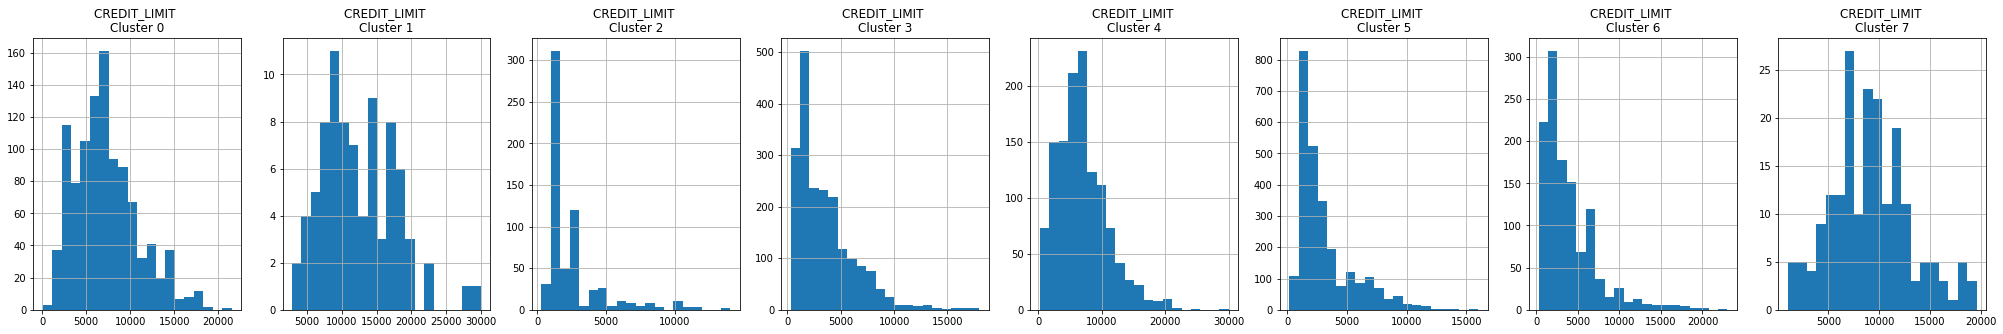

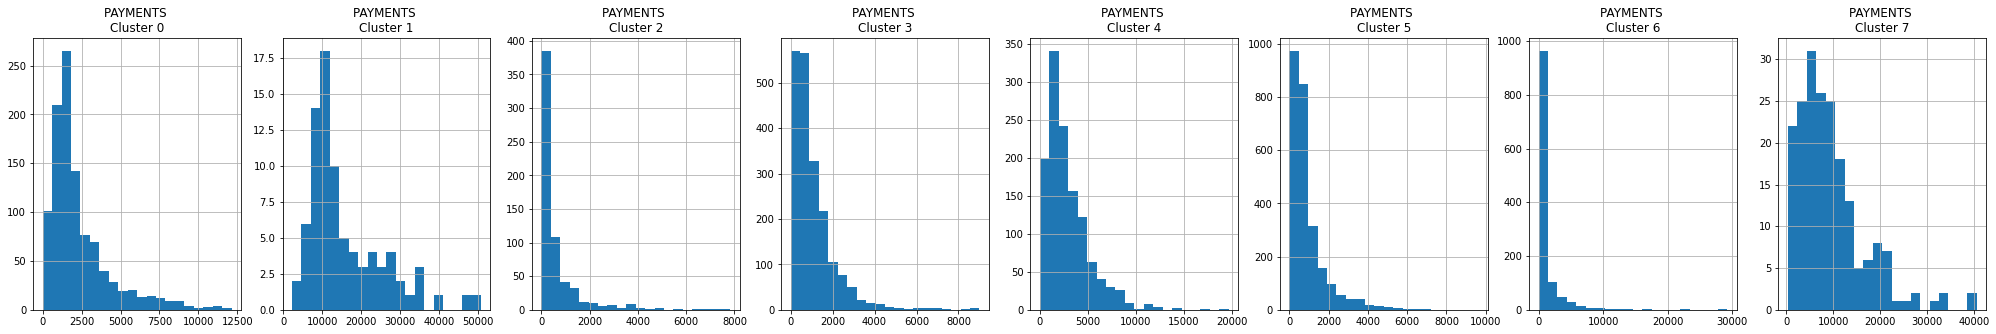

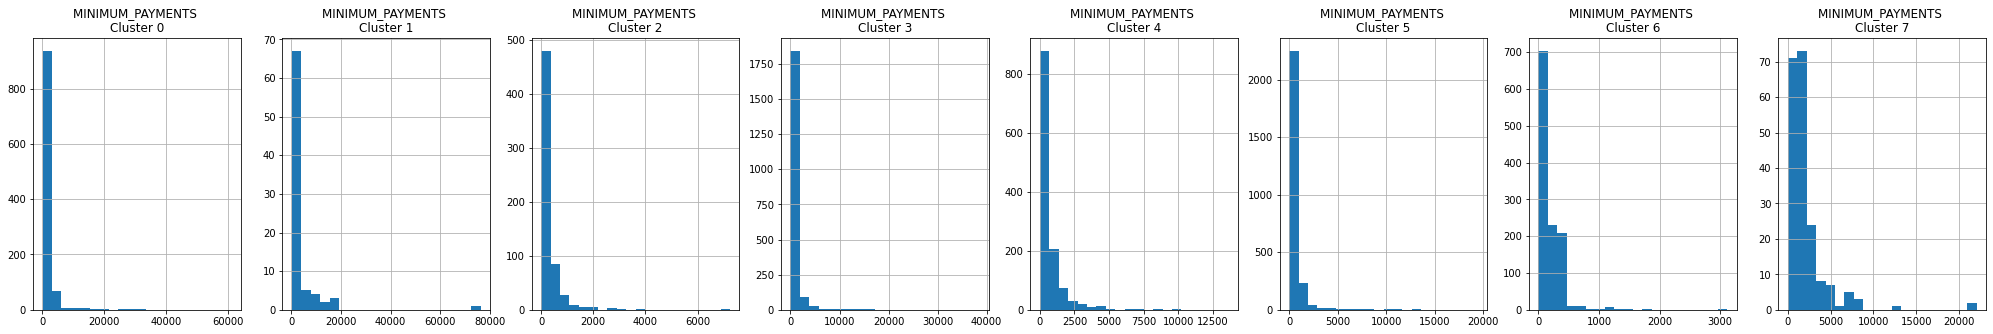

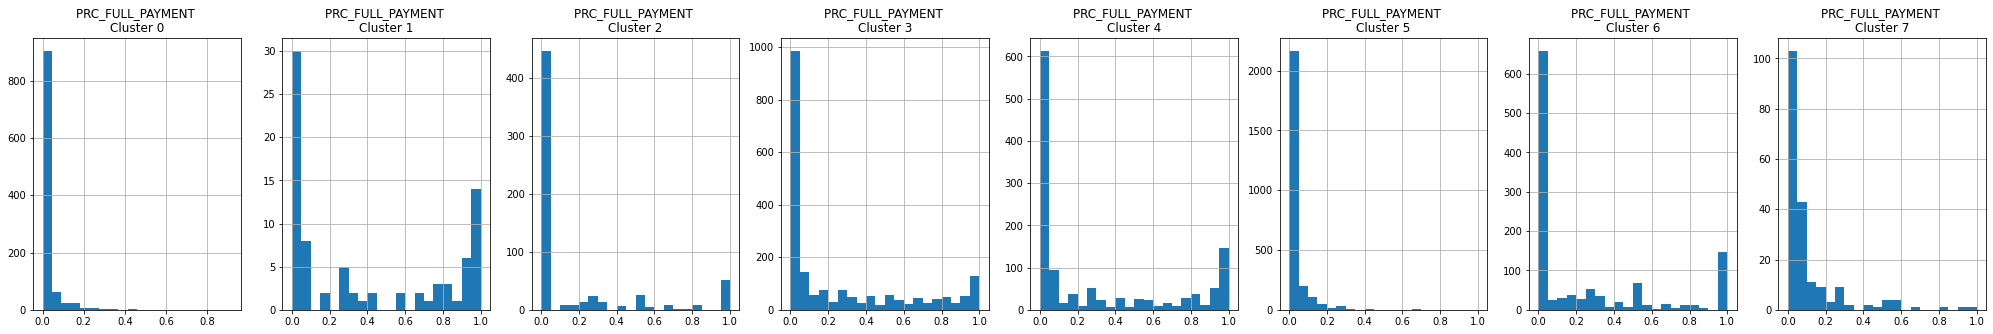

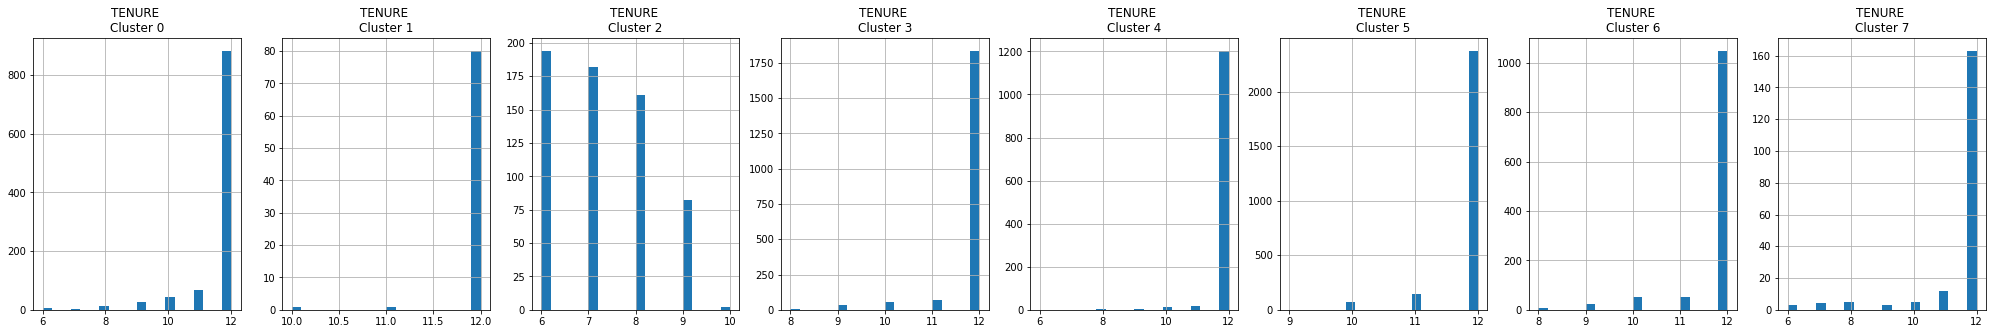

In [34]:
for i in data.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = data_cluster_8[data_cluster_8['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(f'{i} \nCluster {j}')
  plt.show()

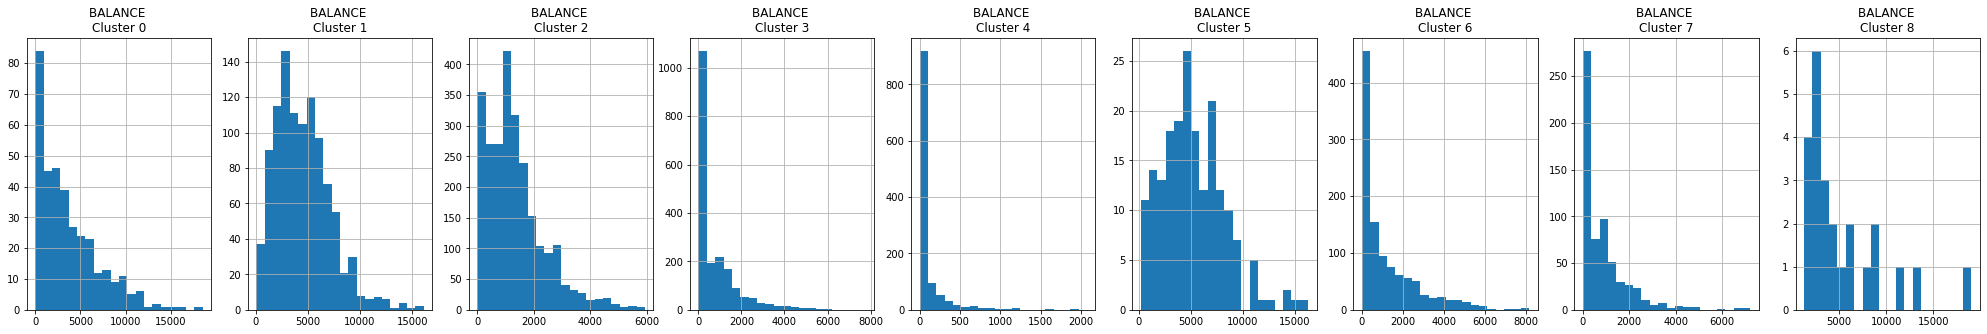

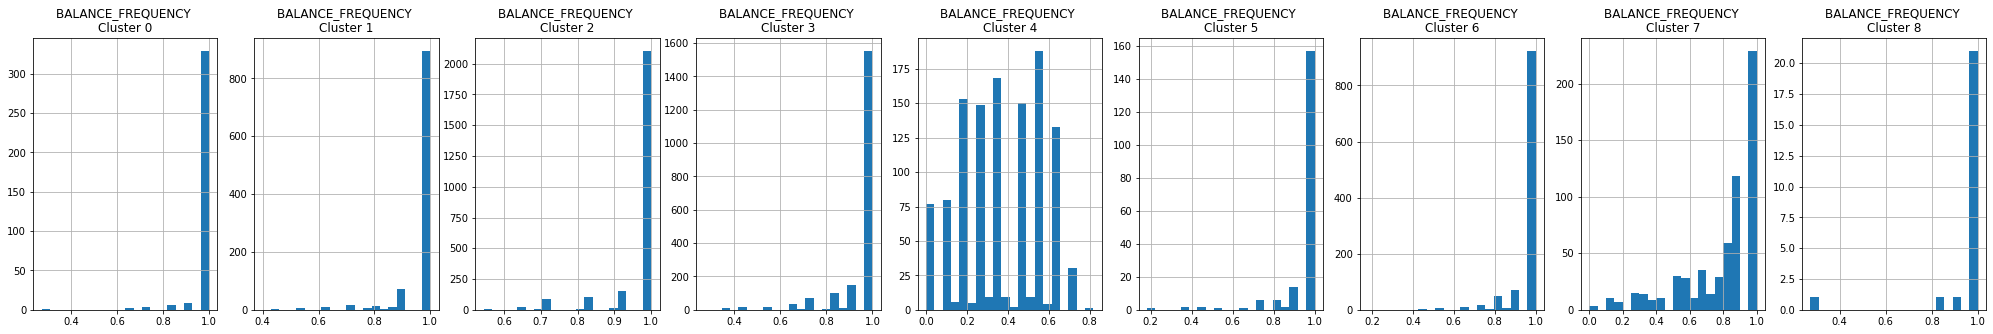

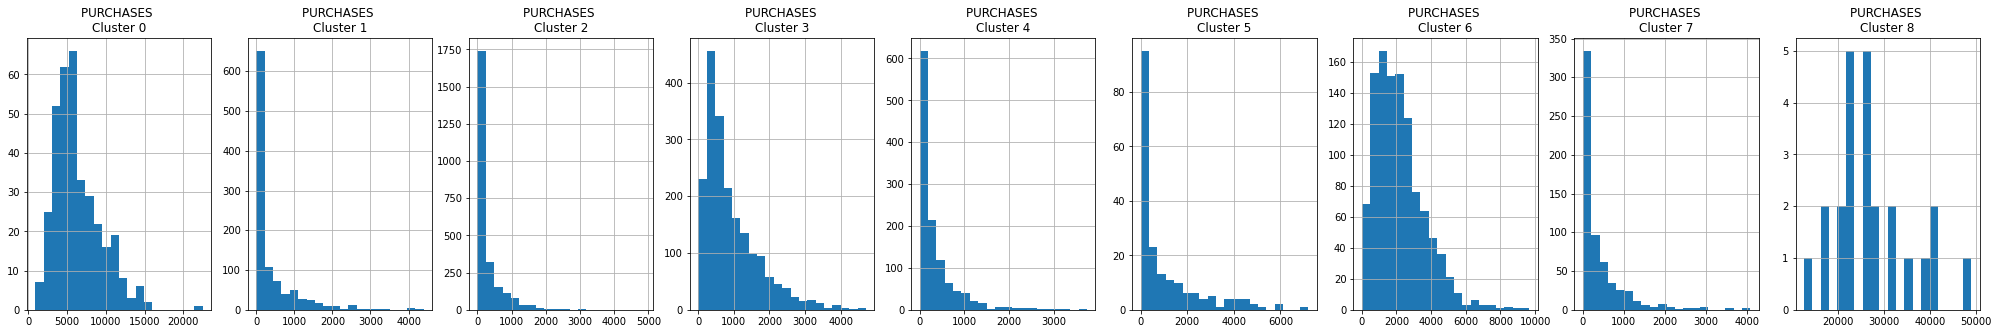

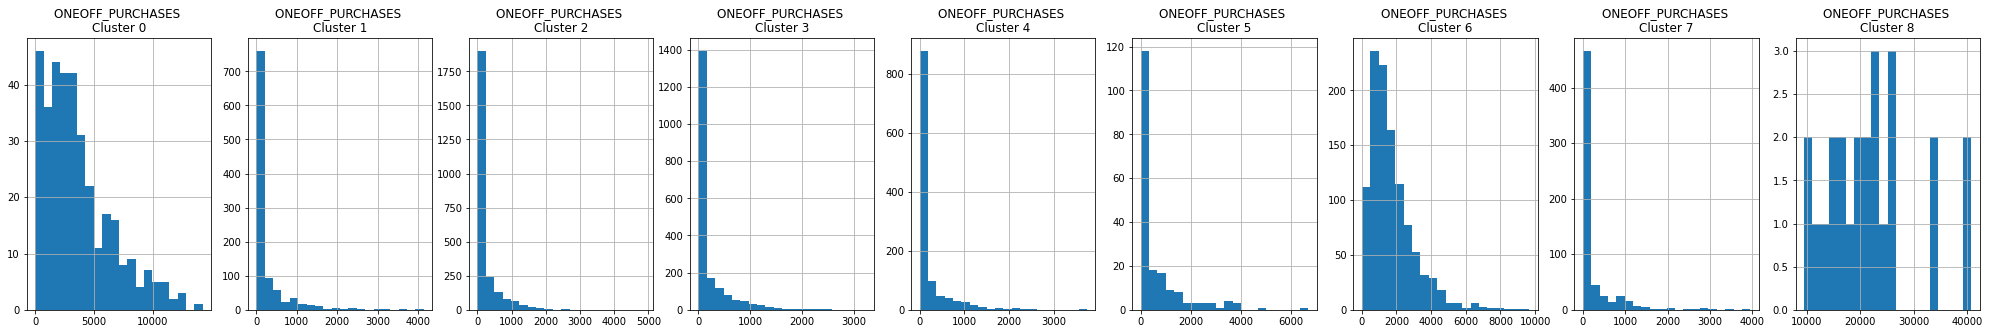

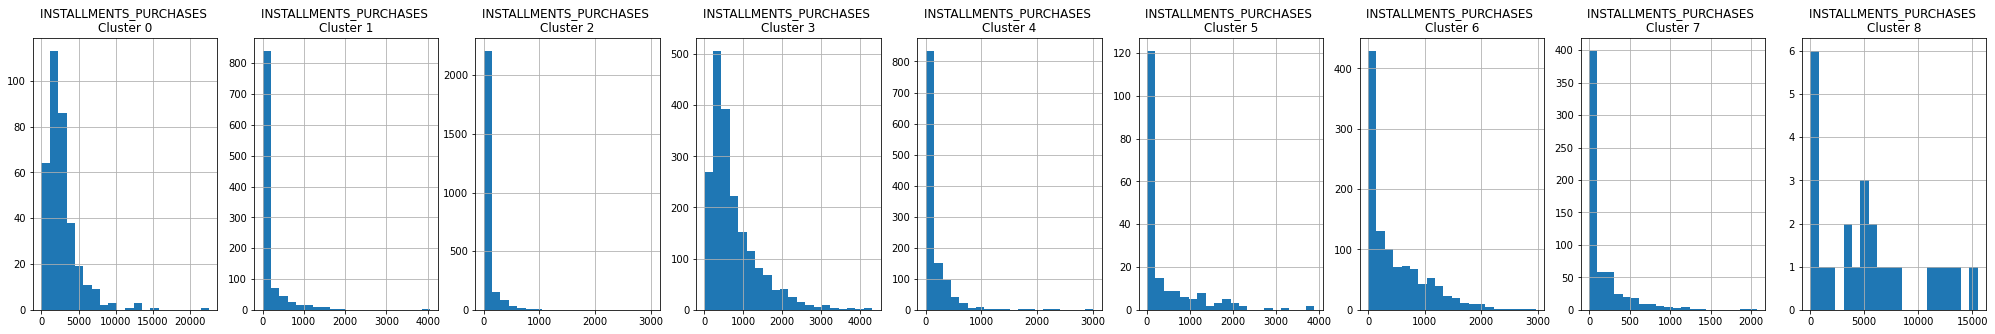

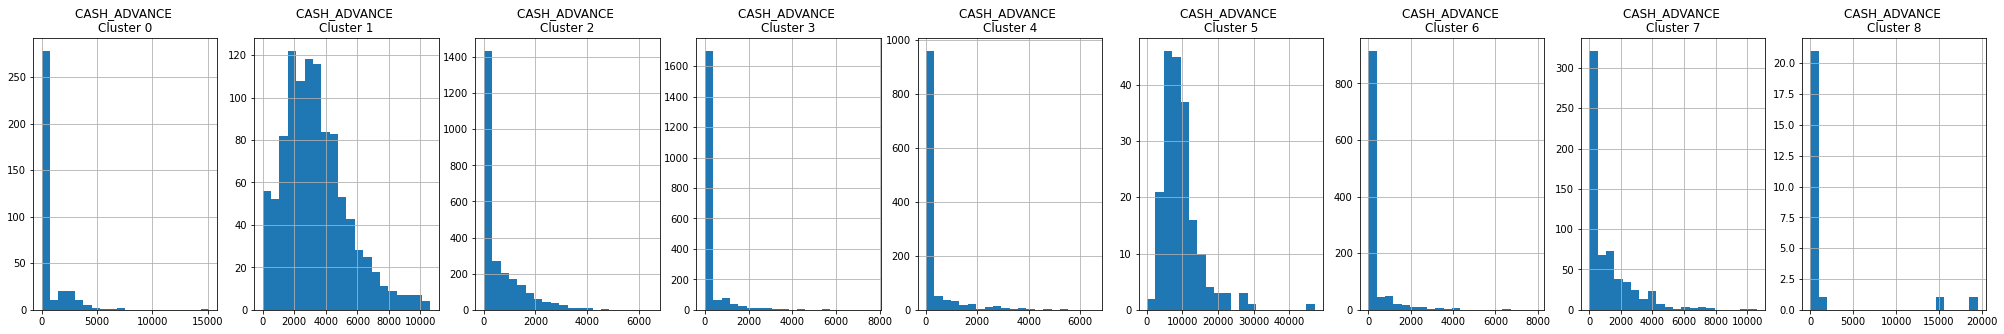

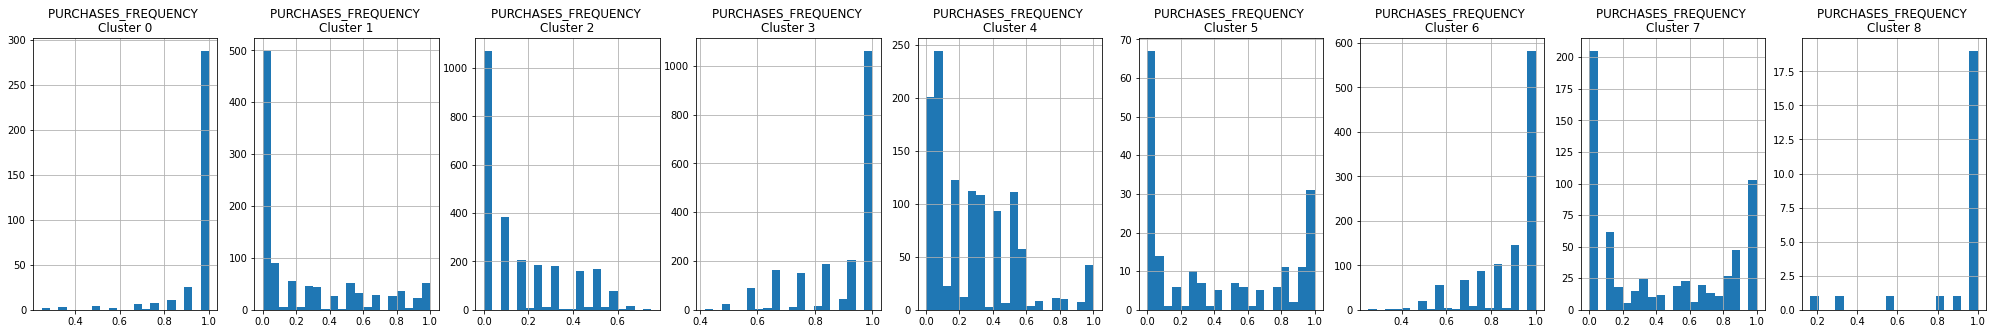

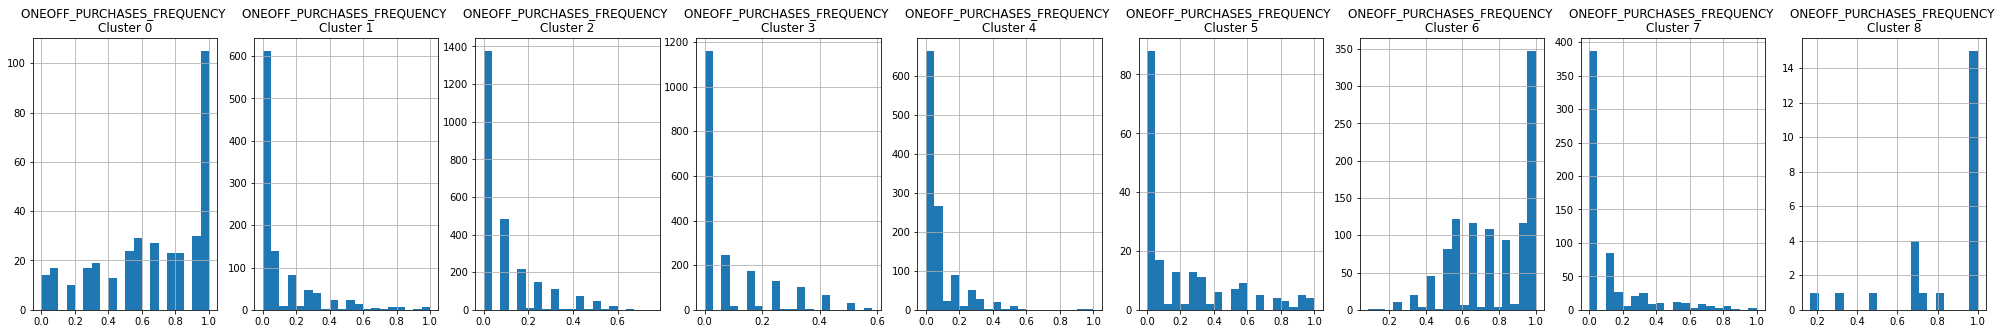

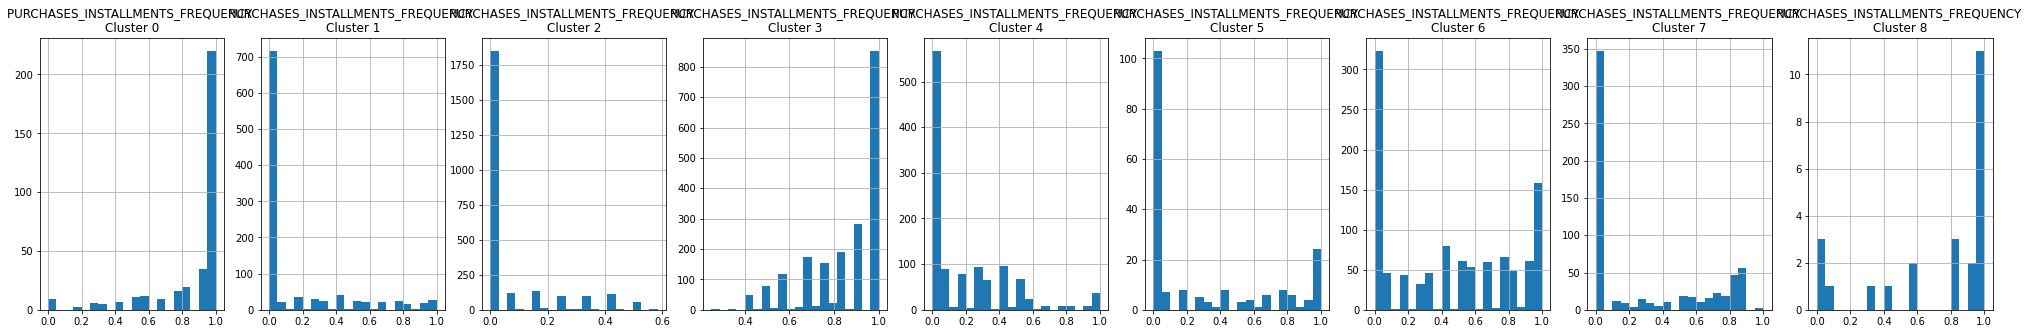

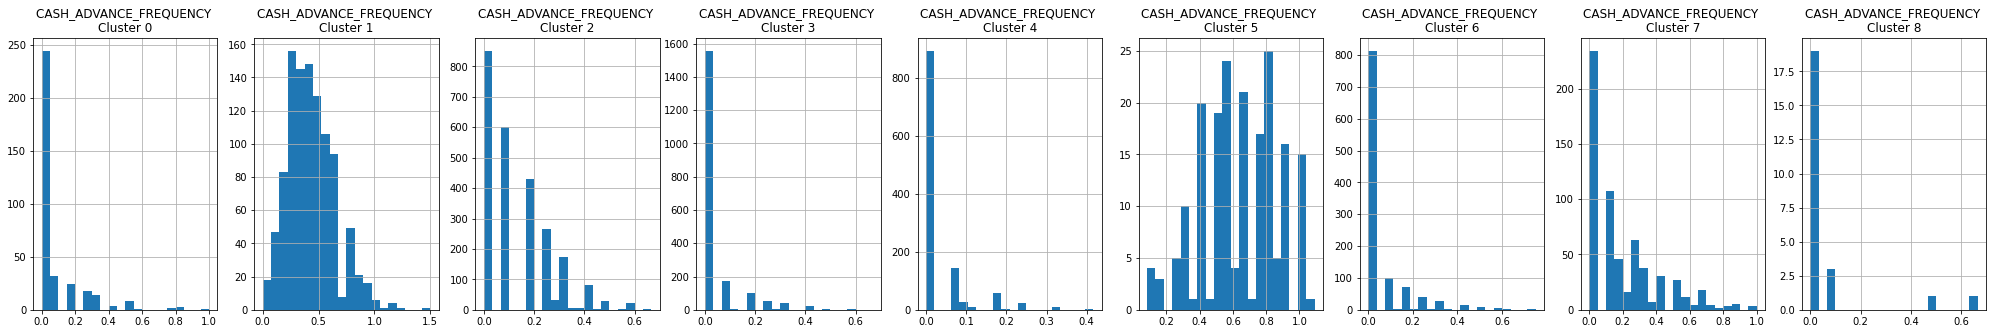

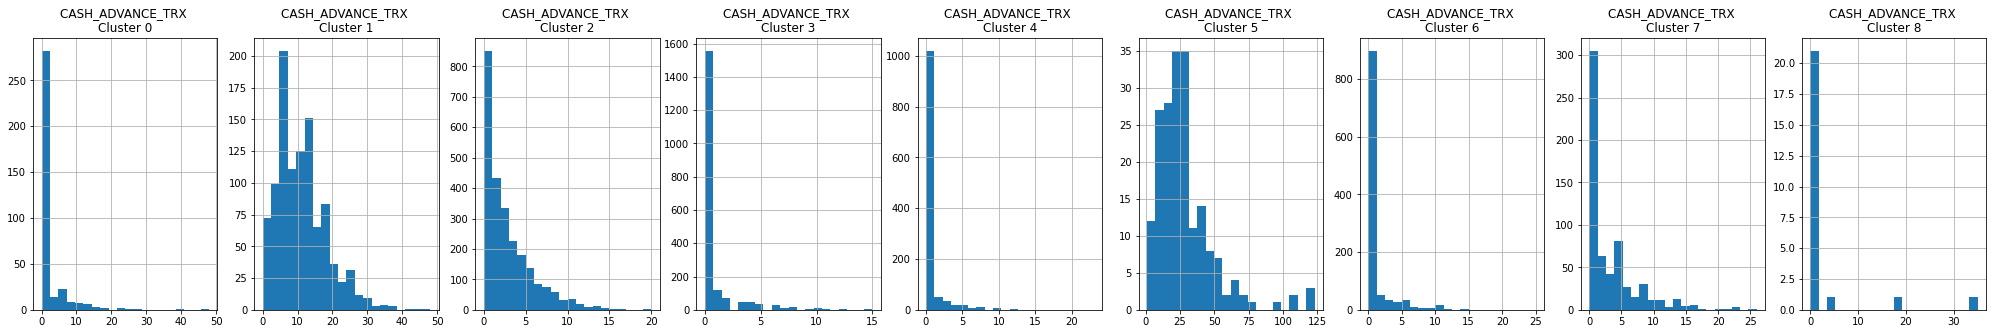

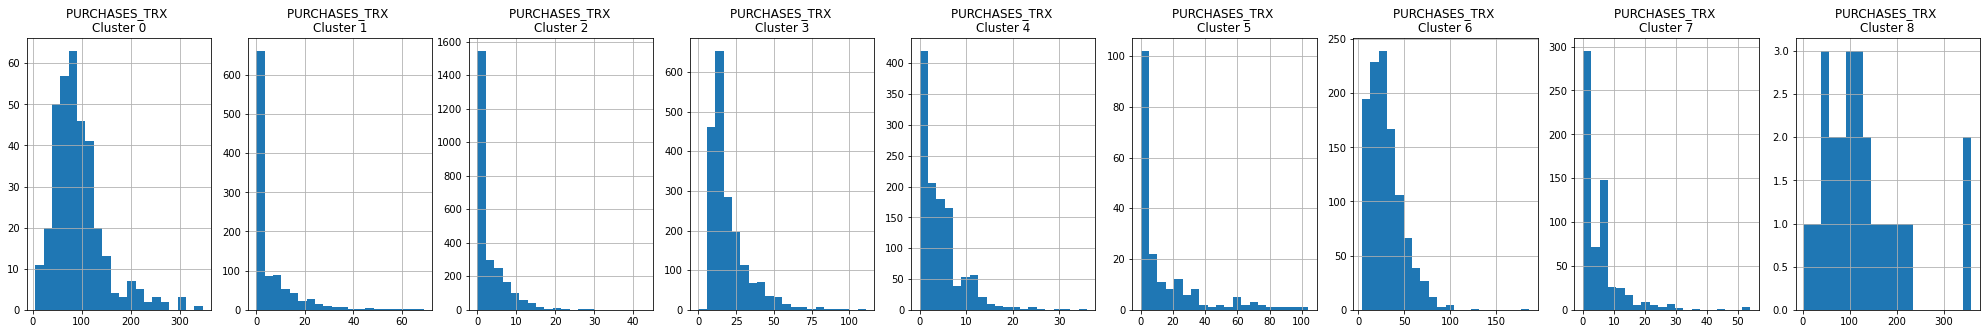

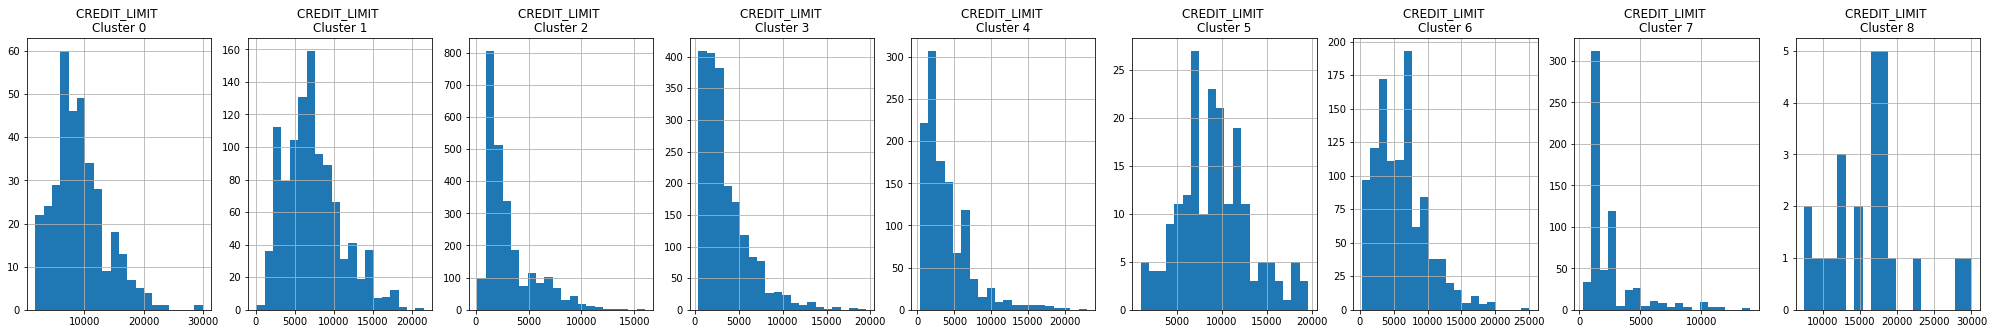

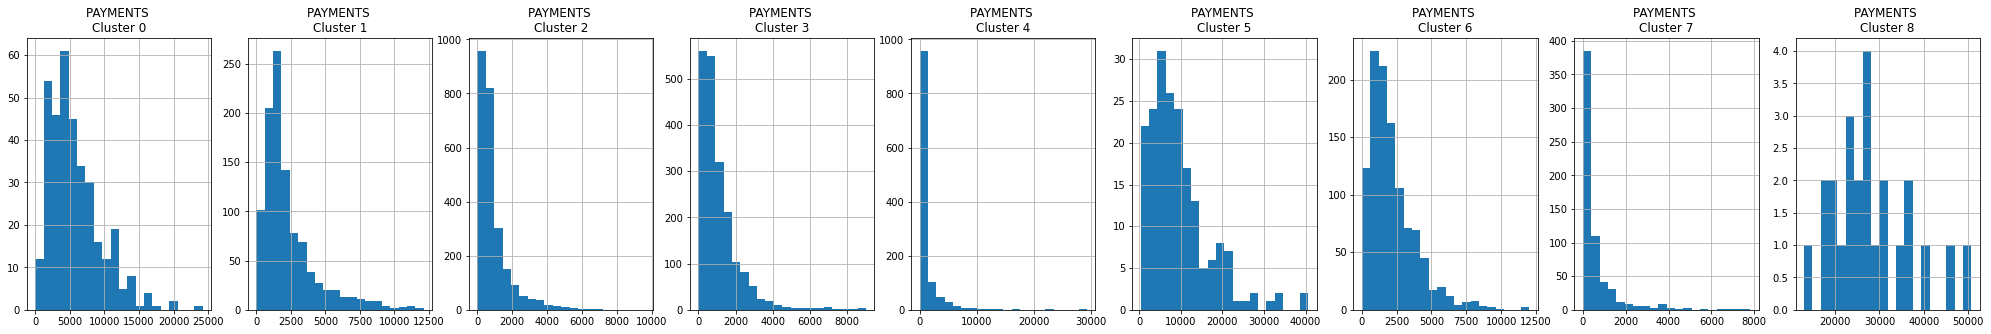

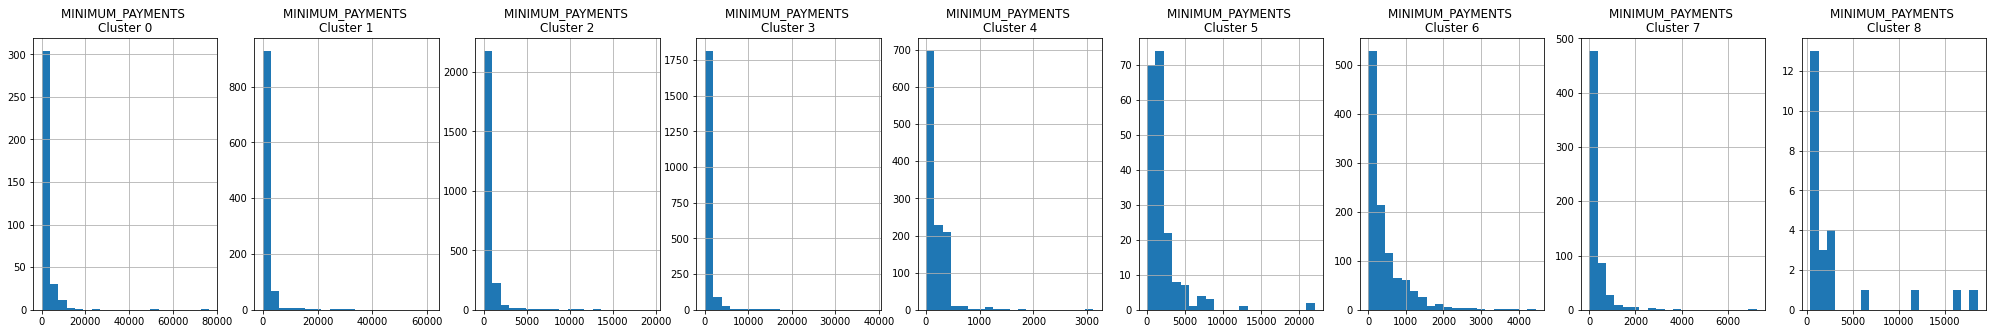

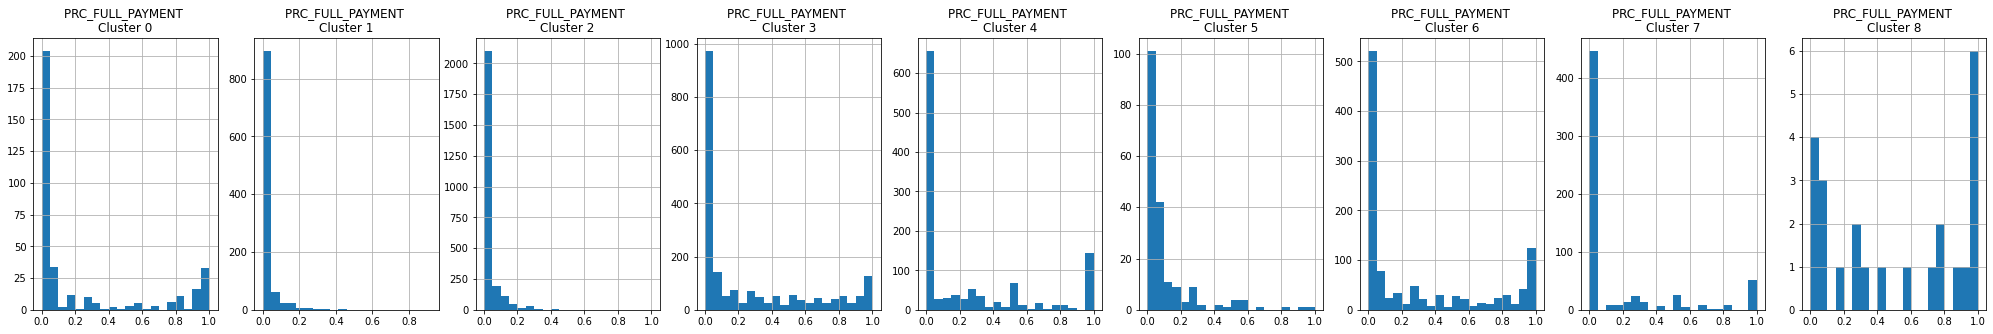

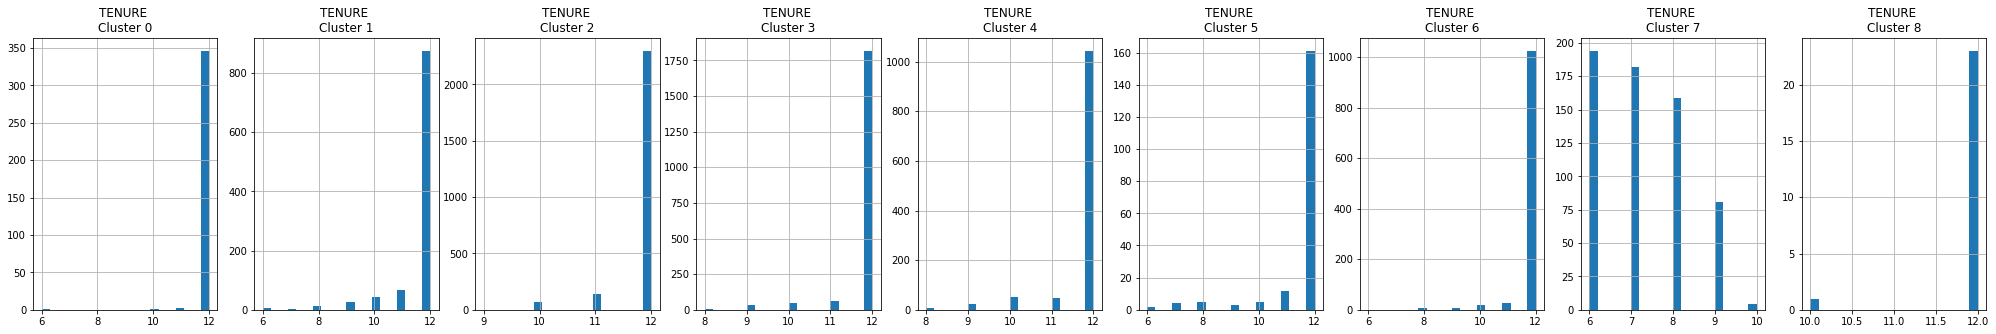

In [35]:
for i in data.columns:
  plt.figure(figsize=(35,5))
  for j in range(9):
    plt.subplot(1, 9, j + 1)
    cluster = data_cluster_9[data_cluster_9['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(f'{i} \nCluster {j}')
  plt.show()

In [36]:
data_cluster_7_sorted = data_cluster_7.sort_values(by='cluster')
data_cluster_8_sorted = data_cluster_8.sort_values(by='cluster')
data_cluster_9_sorted = data_cluster_9.sort_values(by='cluster')

### PCA

In [37]:
pca = PCA(n_components=2)
main_comp = pca.fit_transform(data_scaled)
main_comp

array([[-1.6836484 , -1.0722461 ],
       [-1.13408656,  2.50913248],
       [ 0.96939226, -0.38356782],
       ...,
       [-0.92898358, -1.80804732],
       [-2.33784232, -0.65361048],
       [-0.55802729, -0.4006358 ]])

In [38]:
pca_df = pd.DataFrame(data=main_comp, columns=['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-1.683648,-1.072246
1,-1.134087,2.509132
2,0.969392,-0.383568
3,-0.888221,0.004641
4,-1.600020,-0.683797
...,...,...
8945,-0.362570,-2.013435
8946,-0.580808,-1.675662
8947,-0.928984,-1.808047
8948,-2.337842,-0.653610


In [39]:
pca_df_7 = pd.concat([pca_df, pd.DataFrame({'cluster':labels_7})], axis=1)
pca_df_8 = pd.concat([pca_df, pd.DataFrame({'cluster':labels_8})], axis=1)
pca_df_9 = pd.concat([pca_df, pd.DataFrame({'cluster':labels_9})], axis=1)

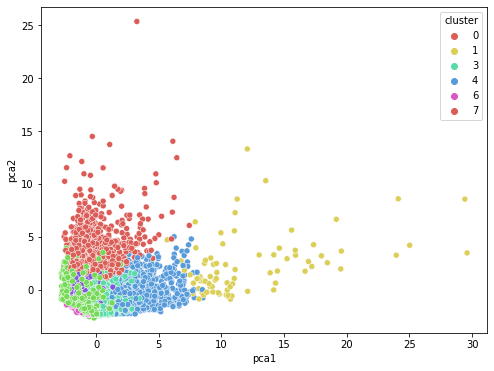

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df_8, palette=('hls'));

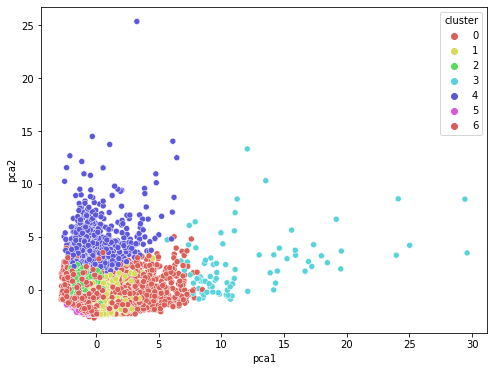

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df_7, palette=('hls'));

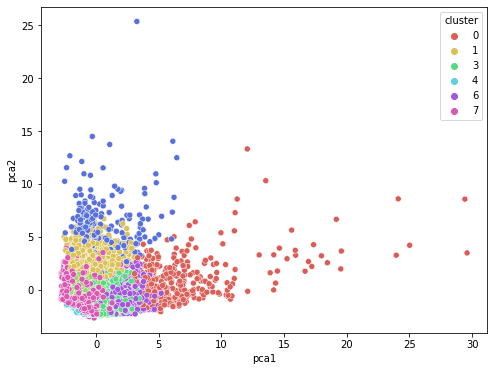

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df_9, palette=('hls'));

### Autoencoders

In [43]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from functools import partial

In [44]:
input_df = Input(shape=(17,))
x = Dense(500, activation=partial(tf.nn.leaky_relu, alpha=0.01))(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [45]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [46]:
# encoder
encoder = Model(input_df, encoded)

In [47]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [48]:
autoencoder.fit(data_scaled, data_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 3s 3ms/step - loss: 0.1932
Epoch 2/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0770
Epoch 3/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0545
Epoch 4/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0529
Epoch 5/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0473
Epoch 6/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0460
Epoch 7/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0408
Epoch 8/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0788
Epoch 9/50
280/280 [==============================] - 1s 4ms/step - loss: 0.0303
Epoch 10/50
280/280 [==============================] - 1s 4ms/step - loss: 0.0353
Epoch 11/50
280/280 [==============================] - 1s 4ms/step - loss: 0.0353
Epoch 12/50
280/280 [==============================] - 1s 3ms/step - loss: 0.0271
Epoch 13/50
280/280 [====

In [49]:
compact = encoder.predict(data_scaled)
compact.shape

280/280 [==============================] - 1s 2ms/step


(8950, 10)

In [50]:
wcss_2 = []
range_val = range(1,20)
for i in range_val:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

In [51]:
print(f"Cluster | Values | Dif %")
for j in range(len(wcss_2)):
    print(f"Clusters {j+1} | {round(wcss_2[j],2)} | {round(((wcss_2[j]/wcss_2[j-1])-1)*100,2)}%")

Cluster | Values | Dif %
Clusters 1 | 73307.43 | 240.11%
Clusters 2 | 55308.91 | -24.55%
Clusters 3 | 47288.2 | -14.5%
Clusters 4 | 42766.58 | -9.56%
Clusters 5 | 39231.32 | -8.27%
Clusters 6 | 36559.16 | -6.81%
Clusters 7 | 34376.05 | -5.97%
Clusters 8 | 32352.42 | -5.89%
Clusters 9 | 30570.73 | -5.51%
Clusters 10 | 28986.22 | -5.18%
Clusters 11 | 27812.57 | -4.05%
Clusters 12 | 26760.7 | -3.78%
Clusters 13 | 25807.88 | -3.56%
Clusters 14 | 25011.93 | -3.08%
Clusters 15 | 24278.54 | -2.93%
Clusters 16 | 23474.27 | -3.31%
Clusters 17 | 22857.58 | -2.63%
Clusters 18 | 22093.57 | -3.34%
Clusters 19 | 21554.2 | -2.44%


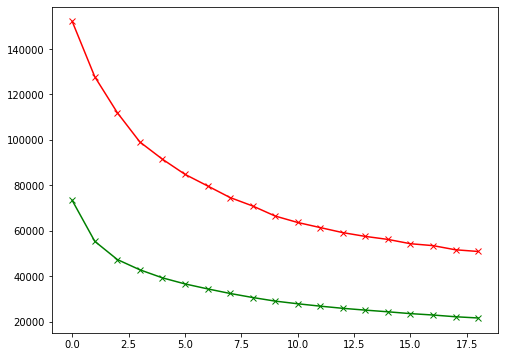

In [55]:
plt.figure(figsize=(8,6))
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [70]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(compact)
labels = kmeans.labels_
labels, labels.shape

(array([0, 2, 0, ..., 2, 2, 2], dtype=int32), (8950,))

In [71]:
df_cluster_ae = pd.concat([data, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_ae.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [72]:
pca = PCA(n_components = 2)
main_comp2 = pca.fit_transform(compact)
pca_df2 = pd.DataFrame(data = main_comp2, columns = ['pca1', 'pca2'])
pca_df2.head()

,pca1,pca2
0,-1.186843,-0.161023
1,1.043926,-1.107931
2,-1.138097,0.226505
3,-1.404414,0.099810
4,-1.139288,-0.233788


In [73]:
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df2.head()

,pca1,pca2,cluster
0,-1.186843,-0.161023,0
1,1.043926,-1.107931,2
2,-1.138097,0.226505,0
3,-1.404414,0.099810,0
4,-1.139288,-0.233788,0


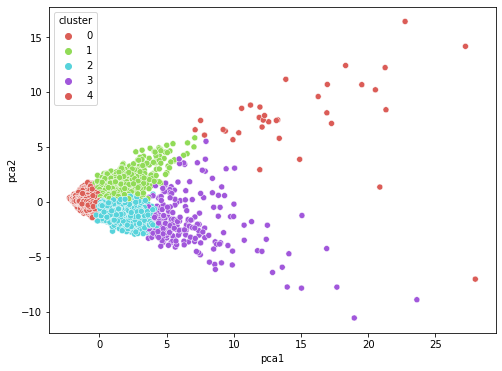

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df2, palette=('hls'));

In [75]:
df_cluster_sorted_2 = df_cluster_ae.sort_values(by = 'cluster')
df_cluster_sorted_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
5348,2409.236843,1.000000,990.15,772.6,217.55,0.000000,0.750000,0.416667,0.416667,0.000000,0,26,8000.0,707.712681,606.899998,0.0,12,0
5346,26.767358,0.600000,190.00,90.0,100.00,0.000000,0.500000,0.100000,0.300000,0.000000,0,7,1200.0,270.658600,136.109592,0.0,10,0
5343,985.457755,1.000000,672.31,103.0,569.31,0.000000,1.000000,0.166667,1.000000,0.000000,0,17,2500.0,1656.974517,542.146630,0.0,12,0
5342,1478.552756,1.000000,479.10,311.1,168.00,901.677781,0.500000,0.416667,0.500000,0.083333,1,11,4500.0,4774.597215,478.802097,0.0,12,0
